# Ensemble classifiers

NOTA IMPORTANTE. Per ora considerare solo Bagging e AdaBoost che sono i metodi trattati nel corso

In [11]:
import statistics
import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
from classification_utils import *
from sklearn.model_selection import cross_validate
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
import statistics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.decomposition import PCA
import pickle

In [2]:
data = pd.read_csv("dataset/cleaned_user_profiles.csv", index_col=0)
data = data.join(pd.get_dummies(data["lang"]))
train_set, test_set, train_label, test_label = prepare_data(data)

Classification features : ['created_at', 'statuses_count', 'avg_length', 'avg_special_chars', 'urls_ratio', 'mentions_ratio', 'hashtags_ratio', 'reply_count_mean', 'reply_count_std', 'favorite_count_mean', 'favorite_count_std', 'favorite_count_entropy', 'retweet_count_mean', 'retweet_count_std', 'ar', 'da', 'de', 'el', 'en', 'es', 'fil', 'fr', 'id', 'it', 'ja', 'ko', 'nl', 'pl', 'pt', 'ru', 'sv', 'tr', 'zh']


## Bagging

In [3]:
param_grid = {
                'n_estimators': np.arange(2, 40, 1),
                'max_features': [0.7, 0.8, 0.85, 0.9, 1.0],
                'max_samples': [0.7, 0.8, 0.85, 0.9, 1.0]
             }

bagging = BaggingClassifier()

grid = GridSearchCV(
    bagging,
    param_grid,
    cv=3,
    scoring='accuracy',
    return_train_score=False,
    verbose=4
)

grid.fit(train_set, train_label)

Fitting 3 folds for each of 950 candidates, totalling 2850 fits
[CV 1/3] END max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.815 total time=   0.0s
[CV 2/3] END max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.755 total time=   0.0s
[CV 3/3] END max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.755 total time=   0.0s
[CV 1/3] END max_features=0.7, max_samples=0.7, n_estimators=3;, score=0.850 total time=   0.0s
[CV 2/3] END max_features=0.7, max_samples=0.7, n_estimators=3;, score=0.869 total time=   0.0s
[CV 3/3] END max_features=0.7, max_samples=0.7, n_estimators=3;, score=0.786 total time=   0.0s
[CV 1/3] END max_features=0.7, max_samples=0.7, n_estimators=4;, score=0.847 total time=   0.1s
[CV 2/3] END max_features=0.7, max_samples=0.7, n_estimators=4;, score=0.846 total time=   0.1s
[CV 3/3] END max_features=0.7, max_samples=0.7, n_estimators=4;, score=0.806 total time=   0.1s
[CV 1/3] END max_features=0.7, max_samples=0.7, n_estimators=5;, score=0

[CV 2/3] END max_features=0.7, max_samples=0.7, n_estimators=30;, score=0.900 total time=   0.4s
[CV 3/3] END max_features=0.7, max_samples=0.7, n_estimators=30;, score=0.885 total time=   0.4s
[CV 1/3] END max_features=0.7, max_samples=0.7, n_estimators=31;, score=0.889 total time=   0.4s
[CV 2/3] END max_features=0.7, max_samples=0.7, n_estimators=31;, score=0.901 total time=   0.4s
[CV 3/3] END max_features=0.7, max_samples=0.7, n_estimators=31;, score=0.887 total time=   0.4s
[CV 1/3] END max_features=0.7, max_samples=0.7, n_estimators=32;, score=0.891 total time=   0.4s
[CV 2/3] END max_features=0.7, max_samples=0.7, n_estimators=32;, score=0.896 total time=   0.5s
[CV 3/3] END max_features=0.7, max_samples=0.7, n_estimators=32;, score=0.887 total time=   0.4s
[CV 1/3] END max_features=0.7, max_samples=0.7, n_estimators=33;, score=0.888 total time=   0.4s
[CV 2/3] END max_features=0.7, max_samples=0.7, n_estimators=33;, score=0.899 total time=   0.5s
[CV 3/3] END max_features=0.7,

[CV 3/3] END max_features=0.7, max_samples=0.8, n_estimators=20;, score=0.876 total time=   0.3s
[CV 1/3] END max_features=0.7, max_samples=0.8, n_estimators=21;, score=0.891 total time=   0.3s
[CV 2/3] END max_features=0.7, max_samples=0.8, n_estimators=21;, score=0.894 total time=   0.3s
[CV 3/3] END max_features=0.7, max_samples=0.8, n_estimators=21;, score=0.870 total time=   0.3s
[CV 1/3] END max_features=0.7, max_samples=0.8, n_estimators=22;, score=0.885 total time=   0.3s
[CV 2/3] END max_features=0.7, max_samples=0.8, n_estimators=22;, score=0.895 total time=   0.3s
[CV 3/3] END max_features=0.7, max_samples=0.8, n_estimators=22;, score=0.883 total time=   0.3s
[CV 1/3] END max_features=0.7, max_samples=0.8, n_estimators=23;, score=0.889 total time=   0.3s
[CV 2/3] END max_features=0.7, max_samples=0.8, n_estimators=23;, score=0.898 total time=   0.3s
[CV 3/3] END max_features=0.7, max_samples=0.8, n_estimators=23;, score=0.883 total time=   0.3s
[CV 1/3] END max_features=0.7,

[CV 2/3] END max_features=0.7, max_samples=0.85, n_estimators=11;, score=0.888 total time=   0.2s
[CV 3/3] END max_features=0.7, max_samples=0.85, n_estimators=11;, score=0.882 total time=   0.2s
[CV 1/3] END max_features=0.7, max_samples=0.85, n_estimators=12;, score=0.879 total time=   0.2s
[CV 2/3] END max_features=0.7, max_samples=0.85, n_estimators=12;, score=0.889 total time=   0.2s
[CV 3/3] END max_features=0.7, max_samples=0.85, n_estimators=12;, score=0.874 total time=   0.2s
[CV 1/3] END max_features=0.7, max_samples=0.85, n_estimators=13;, score=0.878 total time=   0.2s
[CV 2/3] END max_features=0.7, max_samples=0.85, n_estimators=13;, score=0.886 total time=   0.2s
[CV 3/3] END max_features=0.7, max_samples=0.85, n_estimators=13;, score=0.877 total time=   0.2s
[CV 1/3] END max_features=0.7, max_samples=0.85, n_estimators=14;, score=0.871 total time=   0.2s
[CV 2/3] END max_features=0.7, max_samples=0.85, n_estimators=14;, score=0.883 total time=   0.2s
[CV 3/3] END max_fea

[CV 2/3] END max_features=0.7, max_samples=0.85, n_estimators=39;, score=0.897 total time=   0.7s
[CV 3/3] END max_features=0.7, max_samples=0.85, n_estimators=39;, score=0.892 total time=   0.5s
[CV 1/3] END max_features=0.7, max_samples=0.9, n_estimators=2;, score=0.813 total time=   0.0s
[CV 2/3] END max_features=0.7, max_samples=0.9, n_estimators=2;, score=0.819 total time=   0.0s
[CV 3/3] END max_features=0.7, max_samples=0.9, n_estimators=2;, score=0.757 total time=   0.0s
[CV 1/3] END max_features=0.7, max_samples=0.9, n_estimators=3;, score=0.857 total time=   0.1s
[CV 2/3] END max_features=0.7, max_samples=0.9, n_estimators=3;, score=0.853 total time=   0.1s
[CV 3/3] END max_features=0.7, max_samples=0.9, n_estimators=3;, score=0.865 total time=   0.0s
[CV 1/3] END max_features=0.7, max_samples=0.9, n_estimators=4;, score=0.834 total time=   0.1s
[CV 2/3] END max_features=0.7, max_samples=0.9, n_estimators=4;, score=0.853 total time=   0.1s
[CV 3/3] END max_features=0.7, max_s

[CV 3/3] END max_features=0.7, max_samples=0.9, n_estimators=29;, score=0.888 total time=   0.5s
[CV 1/3] END max_features=0.7, max_samples=0.9, n_estimators=30;, score=0.891 total time=   0.5s
[CV 2/3] END max_features=0.7, max_samples=0.9, n_estimators=30;, score=0.897 total time=   0.5s
[CV 3/3] END max_features=0.7, max_samples=0.9, n_estimators=30;, score=0.883 total time=   0.5s
[CV 1/3] END max_features=0.7, max_samples=0.9, n_estimators=31;, score=0.892 total time=   0.5s
[CV 2/3] END max_features=0.7, max_samples=0.9, n_estimators=31;, score=0.899 total time=   0.5s
[CV 3/3] END max_features=0.7, max_samples=0.9, n_estimators=31;, score=0.887 total time=   0.5s
[CV 1/3] END max_features=0.7, max_samples=0.9, n_estimators=32;, score=0.886 total time=   0.6s
[CV 2/3] END max_features=0.7, max_samples=0.9, n_estimators=32;, score=0.896 total time=   0.6s
[CV 3/3] END max_features=0.7, max_samples=0.9, n_estimators=32;, score=0.885 total time=   0.5s
[CV 1/3] END max_features=0.7,

[CV 1/3] END max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.882 total time=   0.4s
[CV 2/3] END max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.889 total time=   0.4s
[CV 3/3] END max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.883 total time=   0.4s
[CV 1/3] END max_features=0.7, max_samples=1.0, n_estimators=21;, score=0.888 total time=   0.4s
[CV 2/3] END max_features=0.7, max_samples=1.0, n_estimators=21;, score=0.897 total time=   0.3s
[CV 3/3] END max_features=0.7, max_samples=1.0, n_estimators=21;, score=0.883 total time=   0.4s
[CV 1/3] END max_features=0.7, max_samples=1.0, n_estimators=22;, score=0.885 total time=   0.4s
[CV 2/3] END max_features=0.7, max_samples=1.0, n_estimators=22;, score=0.889 total time=   0.4s
[CV 3/3] END max_features=0.7, max_samples=1.0, n_estimators=22;, score=0.880 total time=   0.4s
[CV 1/3] END max_features=0.7, max_samples=1.0, n_estimators=23;, score=0.888 total time=   0.4s
[CV 2/3] END max_features=0.7,

[CV 3/3] END max_features=0.8, max_samples=0.7, n_estimators=10;, score=0.874 total time=   0.1s
[CV 1/3] END max_features=0.8, max_samples=0.7, n_estimators=11;, score=0.882 total time=   0.2s
[CV 2/3] END max_features=0.8, max_samples=0.7, n_estimators=11;, score=0.889 total time=   0.2s
[CV 3/3] END max_features=0.8, max_samples=0.7, n_estimators=11;, score=0.872 total time=   0.2s
[CV 1/3] END max_features=0.8, max_samples=0.7, n_estimators=12;, score=0.877 total time=   0.2s
[CV 2/3] END max_features=0.8, max_samples=0.7, n_estimators=12;, score=0.886 total time=   0.2s
[CV 3/3] END max_features=0.8, max_samples=0.7, n_estimators=12;, score=0.871 total time=   0.2s
[CV 1/3] END max_features=0.8, max_samples=0.7, n_estimators=13;, score=0.876 total time=   0.2s
[CV 2/3] END max_features=0.8, max_samples=0.7, n_estimators=13;, score=0.896 total time=   0.2s
[CV 3/3] END max_features=0.8, max_samples=0.7, n_estimators=13;, score=0.884 total time=   0.2s
[CV 1/3] END max_features=0.8,

[CV 1/3] END max_features=0.8, max_samples=0.7, n_estimators=39;, score=0.891 total time=   0.6s
[CV 2/3] END max_features=0.8, max_samples=0.7, n_estimators=39;, score=0.898 total time=   0.6s
[CV 3/3] END max_features=0.8, max_samples=0.7, n_estimators=39;, score=0.892 total time=   0.6s
[CV 1/3] END max_features=0.8, max_samples=0.8, n_estimators=2;, score=0.749 total time=   0.0s
[CV 2/3] END max_features=0.8, max_samples=0.8, n_estimators=2;, score=0.683 total time=   0.0s
[CV 3/3] END max_features=0.8, max_samples=0.8, n_estimators=2;, score=0.805 total time=   0.0s
[CV 1/3] END max_features=0.8, max_samples=0.8, n_estimators=3;, score=0.865 total time=   0.0s
[CV 2/3] END max_features=0.8, max_samples=0.8, n_estimators=3;, score=0.801 total time=   0.1s
[CV 3/3] END max_features=0.8, max_samples=0.8, n_estimators=3;, score=0.791 total time=   0.1s
[CV 1/3] END max_features=0.8, max_samples=0.8, n_estimators=4;, score=0.842 total time=   0.1s
[CV 2/3] END max_features=0.8, max_sa

[CV 2/3] END max_features=0.8, max_samples=0.8, n_estimators=29;, score=0.893 total time=   0.5s
[CV 3/3] END max_features=0.8, max_samples=0.8, n_estimators=29;, score=0.888 total time=   0.5s
[CV 1/3] END max_features=0.8, max_samples=0.8, n_estimators=30;, score=0.885 total time=   0.4s
[CV 2/3] END max_features=0.8, max_samples=0.8, n_estimators=30;, score=0.892 total time=   0.5s
[CV 3/3] END max_features=0.8, max_samples=0.8, n_estimators=30;, score=0.883 total time=   0.5s
[CV 1/3] END max_features=0.8, max_samples=0.8, n_estimators=31;, score=0.890 total time=   0.5s
[CV 2/3] END max_features=0.8, max_samples=0.8, n_estimators=31;, score=0.899 total time=   0.4s
[CV 3/3] END max_features=0.8, max_samples=0.8, n_estimators=31;, score=0.891 total time=   0.5s
[CV 1/3] END max_features=0.8, max_samples=0.8, n_estimators=32;, score=0.888 total time=   0.6s
[CV 2/3] END max_features=0.8, max_samples=0.8, n_estimators=32;, score=0.893 total time=   0.5s
[CV 3/3] END max_features=0.8,

[CV 3/3] END max_features=0.8, max_samples=0.85, n_estimators=19;, score=0.880 total time=   0.3s
[CV 1/3] END max_features=0.8, max_samples=0.85, n_estimators=20;, score=0.886 total time=   0.3s
[CV 2/3] END max_features=0.8, max_samples=0.85, n_estimators=20;, score=0.892 total time=   0.3s
[CV 3/3] END max_features=0.8, max_samples=0.85, n_estimators=20;, score=0.874 total time=   0.3s
[CV 1/3] END max_features=0.8, max_samples=0.85, n_estimators=21;, score=0.889 total time=   0.4s
[CV 2/3] END max_features=0.8, max_samples=0.85, n_estimators=21;, score=0.896 total time=   0.4s
[CV 3/3] END max_features=0.8, max_samples=0.85, n_estimators=21;, score=0.881 total time=   0.4s
[CV 1/3] END max_features=0.8, max_samples=0.85, n_estimators=22;, score=0.883 total time=   0.4s
[CV 2/3] END max_features=0.8, max_samples=0.85, n_estimators=22;, score=0.890 total time=   0.4s
[CV 3/3] END max_features=0.8, max_samples=0.85, n_estimators=22;, score=0.884 total time=   0.3s
[CV 1/3] END max_fea

[CV 1/3] END max_features=0.8, max_samples=0.9, n_estimators=10;, score=0.867 total time=   0.2s
[CV 2/3] END max_features=0.8, max_samples=0.9, n_estimators=10;, score=0.878 total time=   0.2s
[CV 3/3] END max_features=0.8, max_samples=0.9, n_estimators=10;, score=0.872 total time=   0.2s
[CV 1/3] END max_features=0.8, max_samples=0.9, n_estimators=11;, score=0.886 total time=   0.2s
[CV 2/3] END max_features=0.8, max_samples=0.9, n_estimators=11;, score=0.886 total time=   0.2s
[CV 3/3] END max_features=0.8, max_samples=0.9, n_estimators=11;, score=0.876 total time=   0.2s
[CV 1/3] END max_features=0.8, max_samples=0.9, n_estimators=12;, score=0.877 total time=   0.2s
[CV 2/3] END max_features=0.8, max_samples=0.9, n_estimators=12;, score=0.881 total time=   0.2s
[CV 3/3] END max_features=0.8, max_samples=0.9, n_estimators=12;, score=0.878 total time=   0.2s
[CV 1/3] END max_features=0.8, max_samples=0.9, n_estimators=13;, score=0.886 total time=   0.2s
[CV 2/3] END max_features=0.8,

[CV 2/3] END max_features=0.8, max_samples=0.9, n_estimators=38;, score=0.896 total time=   0.7s
[CV 3/3] END max_features=0.8, max_samples=0.9, n_estimators=38;, score=0.888 total time=   0.6s
[CV 1/3] END max_features=0.8, max_samples=0.9, n_estimators=39;, score=0.888 total time=   0.7s
[CV 2/3] END max_features=0.8, max_samples=0.9, n_estimators=39;, score=0.900 total time=   0.7s
[CV 3/3] END max_features=0.8, max_samples=0.9, n_estimators=39;, score=0.889 total time=   0.7s
[CV 1/3] END max_features=0.8, max_samples=1.0, n_estimators=2;, score=0.828 total time=   0.0s
[CV 2/3] END max_features=0.8, max_samples=1.0, n_estimators=2;, score=0.762 total time=   0.0s
[CV 3/3] END max_features=0.8, max_samples=1.0, n_estimators=2;, score=0.809 total time=   0.0s
[CV 1/3] END max_features=0.8, max_samples=1.0, n_estimators=3;, score=0.856 total time=   0.1s
[CV 2/3] END max_features=0.8, max_samples=1.0, n_estimators=3;, score=0.857 total time=   0.1s
[CV 3/3] END max_features=0.8, max_

[CV 3/3] END max_features=0.8, max_samples=1.0, n_estimators=28;, score=0.886 total time=   0.5s
[CV 1/3] END max_features=0.8, max_samples=1.0, n_estimators=29;, score=0.884 total time=   0.5s
[CV 2/3] END max_features=0.8, max_samples=1.0, n_estimators=29;, score=0.898 total time=   0.5s
[CV 3/3] END max_features=0.8, max_samples=1.0, n_estimators=29;, score=0.886 total time=   0.5s
[CV 1/3] END max_features=0.8, max_samples=1.0, n_estimators=30;, score=0.883 total time=   0.6s
[CV 2/3] END max_features=0.8, max_samples=1.0, n_estimators=30;, score=0.899 total time=   0.6s
[CV 3/3] END max_features=0.8, max_samples=1.0, n_estimators=30;, score=0.882 total time=   0.6s
[CV 1/3] END max_features=0.8, max_samples=1.0, n_estimators=31;, score=0.891 total time=   0.6s
[CV 2/3] END max_features=0.8, max_samples=1.0, n_estimators=31;, score=0.898 total time=   0.6s
[CV 3/3] END max_features=0.8, max_samples=1.0, n_estimators=31;, score=0.889 total time=   0.6s
[CV 1/3] END max_features=0.8,

[CV 1/3] END max_features=0.85, max_samples=0.7, n_estimators=19;, score=0.886 total time=   0.3s
[CV 2/3] END max_features=0.85, max_samples=0.7, n_estimators=19;, score=0.896 total time=   0.3s
[CV 3/3] END max_features=0.85, max_samples=0.7, n_estimators=19;, score=0.884 total time=   0.3s
[CV 1/3] END max_features=0.85, max_samples=0.7, n_estimators=20;, score=0.879 total time=   0.3s
[CV 2/3] END max_features=0.85, max_samples=0.7, n_estimators=20;, score=0.885 total time=   0.3s
[CV 3/3] END max_features=0.85, max_samples=0.7, n_estimators=20;, score=0.879 total time=   0.3s
[CV 1/3] END max_features=0.85, max_samples=0.7, n_estimators=21;, score=0.886 total time=   0.3s
[CV 2/3] END max_features=0.85, max_samples=0.7, n_estimators=21;, score=0.899 total time=   0.4s
[CV 3/3] END max_features=0.85, max_samples=0.7, n_estimators=21;, score=0.885 total time=   0.3s
[CV 1/3] END max_features=0.85, max_samples=0.7, n_estimators=22;, score=0.885 total time=   0.3s
[CV 2/3] END max_fea

[CV 1/3] END max_features=0.85, max_samples=0.8, n_estimators=9;, score=0.883 total time=   0.1s
[CV 2/3] END max_features=0.85, max_samples=0.8, n_estimators=9;, score=0.886 total time=   0.1s
[CV 3/3] END max_features=0.85, max_samples=0.8, n_estimators=9;, score=0.877 total time=   0.2s
[CV 1/3] END max_features=0.85, max_samples=0.8, n_estimators=10;, score=0.867 total time=   0.2s
[CV 2/3] END max_features=0.85, max_samples=0.8, n_estimators=10;, score=0.848 total time=   0.2s
[CV 3/3] END max_features=0.85, max_samples=0.8, n_estimators=10;, score=0.876 total time=   0.2s
[CV 1/3] END max_features=0.85, max_samples=0.8, n_estimators=11;, score=0.882 total time=   0.2s
[CV 2/3] END max_features=0.85, max_samples=0.8, n_estimators=11;, score=0.888 total time=   0.2s
[CV 3/3] END max_features=0.85, max_samples=0.8, n_estimators=11;, score=0.876 total time=   0.2s
[CV 1/3] END max_features=0.85, max_samples=0.8, n_estimators=12;, score=0.879 total time=   0.2s
[CV 2/3] END max_featur

[CV 1/3] END max_features=0.85, max_samples=0.8, n_estimators=37;, score=0.889 total time=   0.7s
[CV 2/3] END max_features=0.85, max_samples=0.8, n_estimators=37;, score=0.896 total time=   0.6s
[CV 3/3] END max_features=0.85, max_samples=0.8, n_estimators=37;, score=0.890 total time=   0.6s
[CV 1/3] END max_features=0.85, max_samples=0.8, n_estimators=38;, score=0.885 total time=   0.7s
[CV 2/3] END max_features=0.85, max_samples=0.8, n_estimators=38;, score=0.896 total time=   0.6s
[CV 3/3] END max_features=0.85, max_samples=0.8, n_estimators=38;, score=0.888 total time=   0.6s
[CV 1/3] END max_features=0.85, max_samples=0.8, n_estimators=39;, score=0.894 total time=   0.7s
[CV 2/3] END max_features=0.85, max_samples=0.8, n_estimators=39;, score=0.896 total time=   0.7s
[CV 3/3] END max_features=0.85, max_samples=0.8, n_estimators=39;, score=0.891 total time=   0.6s
[CV 1/3] END max_features=0.85, max_samples=0.85, n_estimators=2;, score=0.809 total time=   0.0s
[CV 2/3] END max_fea

[CV 1/3] END max_features=0.85, max_samples=0.85, n_estimators=27;, score=0.885 total time=   0.5s
[CV 2/3] END max_features=0.85, max_samples=0.85, n_estimators=27;, score=0.897 total time=   0.5s
[CV 3/3] END max_features=0.85, max_samples=0.85, n_estimators=27;, score=0.891 total time=   0.4s
[CV 1/3] END max_features=0.85, max_samples=0.85, n_estimators=28;, score=0.889 total time=   0.5s
[CV 2/3] END max_features=0.85, max_samples=0.85, n_estimators=28;, score=0.895 total time=   0.5s
[CV 3/3] END max_features=0.85, max_samples=0.85, n_estimators=28;, score=0.883 total time=   0.5s
[CV 1/3] END max_features=0.85, max_samples=0.85, n_estimators=29;, score=0.886 total time=   0.5s
[CV 2/3] END max_features=0.85, max_samples=0.85, n_estimators=29;, score=0.899 total time=   0.5s
[CV 3/3] END max_features=0.85, max_samples=0.85, n_estimators=29;, score=0.888 total time=   0.5s
[CV 1/3] END max_features=0.85, max_samples=0.85, n_estimators=30;, score=0.886 total time=   0.5s
[CV 2/3] E

[CV 1/3] END max_features=0.85, max_samples=0.9, n_estimators=17;, score=0.883 total time=   0.3s
[CV 2/3] END max_features=0.85, max_samples=0.9, n_estimators=17;, score=0.891 total time=   0.3s
[CV 3/3] END max_features=0.85, max_samples=0.9, n_estimators=17;, score=0.883 total time=   0.3s
[CV 1/3] END max_features=0.85, max_samples=0.9, n_estimators=18;, score=0.878 total time=   0.3s
[CV 2/3] END max_features=0.85, max_samples=0.9, n_estimators=18;, score=0.891 total time=   0.3s
[CV 3/3] END max_features=0.85, max_samples=0.9, n_estimators=18;, score=0.872 total time=   0.3s
[CV 1/3] END max_features=0.85, max_samples=0.9, n_estimators=19;, score=0.882 total time=   0.4s
[CV 2/3] END max_features=0.85, max_samples=0.9, n_estimators=19;, score=0.892 total time=   0.4s
[CV 3/3] END max_features=0.85, max_samples=0.9, n_estimators=19;, score=0.886 total time=   0.3s
[CV 1/3] END max_features=0.85, max_samples=0.9, n_estimators=20;, score=0.883 total time=   0.4s
[CV 2/3] END max_fea

[CV 1/3] END max_features=0.85, max_samples=1.0, n_estimators=7;, score=0.875 total time=   0.1s
[CV 2/3] END max_features=0.85, max_samples=1.0, n_estimators=7;, score=0.879 total time=   0.1s
[CV 3/3] END max_features=0.85, max_samples=1.0, n_estimators=7;, score=0.883 total time=   0.1s
[CV 1/3] END max_features=0.85, max_samples=1.0, n_estimators=8;, score=0.861 total time=   0.1s
[CV 2/3] END max_features=0.85, max_samples=1.0, n_estimators=8;, score=0.876 total time=   0.1s
[CV 3/3] END max_features=0.85, max_samples=1.0, n_estimators=8;, score=0.858 total time=   0.2s
[CV 1/3] END max_features=0.85, max_samples=1.0, n_estimators=9;, score=0.874 total time=   0.2s
[CV 2/3] END max_features=0.85, max_samples=1.0, n_estimators=9;, score=0.882 total time=   0.2s
[CV 3/3] END max_features=0.85, max_samples=1.0, n_estimators=9;, score=0.882 total time=   0.2s
[CV 1/3] END max_features=0.85, max_samples=1.0, n_estimators=10;, score=0.868 total time=   0.2s
[CV 2/3] END max_features=0.8

[CV 1/3] END max_features=0.85, max_samples=1.0, n_estimators=35;, score=0.890 total time=   0.7s
[CV 2/3] END max_features=0.85, max_samples=1.0, n_estimators=35;, score=0.897 total time=   0.7s
[CV 3/3] END max_features=0.85, max_samples=1.0, n_estimators=35;, score=0.889 total time=   0.7s
[CV 1/3] END max_features=0.85, max_samples=1.0, n_estimators=36;, score=0.888 total time=   0.8s
[CV 2/3] END max_features=0.85, max_samples=1.0, n_estimators=36;, score=0.897 total time=   0.7s
[CV 3/3] END max_features=0.85, max_samples=1.0, n_estimators=36;, score=0.886 total time=   0.7s
[CV 1/3] END max_features=0.85, max_samples=1.0, n_estimators=37;, score=0.888 total time=   0.7s
[CV 2/3] END max_features=0.85, max_samples=1.0, n_estimators=37;, score=0.898 total time=   0.7s
[CV 3/3] END max_features=0.85, max_samples=1.0, n_estimators=37;, score=0.890 total time=   0.7s
[CV 1/3] END max_features=0.85, max_samples=1.0, n_estimators=38;, score=0.883 total time=   0.8s
[CV 2/3] END max_fea

[CV 2/3] END max_features=0.9, max_samples=0.7, n_estimators=25;, score=0.891 total time=   0.4s
[CV 3/3] END max_features=0.9, max_samples=0.7, n_estimators=25;, score=0.883 total time=   0.3s
[CV 1/3] END max_features=0.9, max_samples=0.7, n_estimators=26;, score=0.890 total time=   0.4s
[CV 2/3] END max_features=0.9, max_samples=0.7, n_estimators=26;, score=0.892 total time=   0.4s
[CV 3/3] END max_features=0.9, max_samples=0.7, n_estimators=26;, score=0.888 total time=   0.4s
[CV 1/3] END max_features=0.9, max_samples=0.7, n_estimators=27;, score=0.888 total time=   0.4s
[CV 2/3] END max_features=0.9, max_samples=0.7, n_estimators=27;, score=0.898 total time=   0.4s
[CV 3/3] END max_features=0.9, max_samples=0.7, n_estimators=27;, score=0.888 total time=   0.4s
[CV 1/3] END max_features=0.9, max_samples=0.7, n_estimators=28;, score=0.891 total time=   0.4s
[CV 2/3] END max_features=0.9, max_samples=0.7, n_estimators=28;, score=0.900 total time=   0.4s
[CV 3/3] END max_features=0.9,

[CV 3/3] END max_features=0.9, max_samples=0.8, n_estimators=15;, score=0.881 total time=   0.2s
[CV 1/3] END max_features=0.9, max_samples=0.8, n_estimators=16;, score=0.882 total time=   0.3s
[CV 2/3] END max_features=0.9, max_samples=0.8, n_estimators=16;, score=0.885 total time=   0.3s
[CV 3/3] END max_features=0.9, max_samples=0.8, n_estimators=16;, score=0.876 total time=   0.3s
[CV 1/3] END max_features=0.9, max_samples=0.8, n_estimators=17;, score=0.885 total time=   0.3s
[CV 2/3] END max_features=0.9, max_samples=0.8, n_estimators=17;, score=0.892 total time=   0.3s
[CV 3/3] END max_features=0.9, max_samples=0.8, n_estimators=17;, score=0.883 total time=   0.2s
[CV 1/3] END max_features=0.9, max_samples=0.8, n_estimators=18;, score=0.880 total time=   0.3s
[CV 2/3] END max_features=0.9, max_samples=0.8, n_estimators=18;, score=0.887 total time=   0.3s
[CV 3/3] END max_features=0.9, max_samples=0.8, n_estimators=18;, score=0.877 total time=   0.3s
[CV 1/3] END max_features=0.9,

[CV 2/3] END max_features=0.9, max_samples=0.85, n_estimators=6;, score=0.871 total time=   0.1s
[CV 3/3] END max_features=0.9, max_samples=0.85, n_estimators=6;, score=0.871 total time=   0.1s
[CV 1/3] END max_features=0.9, max_samples=0.85, n_estimators=7;, score=0.877 total time=   0.1s
[CV 2/3] END max_features=0.9, max_samples=0.85, n_estimators=7;, score=0.883 total time=   0.1s
[CV 3/3] END max_features=0.9, max_samples=0.85, n_estimators=7;, score=0.867 total time=   0.1s
[CV 1/3] END max_features=0.9, max_samples=0.85, n_estimators=8;, score=0.861 total time=   0.1s
[CV 2/3] END max_features=0.9, max_samples=0.85, n_estimators=8;, score=0.870 total time=   0.2s
[CV 3/3] END max_features=0.9, max_samples=0.85, n_estimators=8;, score=0.873 total time=   0.1s
[CV 1/3] END max_features=0.9, max_samples=0.85, n_estimators=9;, score=0.879 total time=   0.2s
[CV 2/3] END max_features=0.9, max_samples=0.85, n_estimators=9;, score=0.893 total time=   0.2s
[CV 3/3] END max_features=0.9,

[CV 2/3] END max_features=0.9, max_samples=0.85, n_estimators=34;, score=0.897 total time=   0.6s
[CV 3/3] END max_features=0.9, max_samples=0.85, n_estimators=34;, score=0.883 total time=   0.6s
[CV 1/3] END max_features=0.9, max_samples=0.85, n_estimators=35;, score=0.886 total time=   0.6s
[CV 2/3] END max_features=0.9, max_samples=0.85, n_estimators=35;, score=0.896 total time=   0.6s
[CV 3/3] END max_features=0.9, max_samples=0.85, n_estimators=35;, score=0.891 total time=   0.6s
[CV 1/3] END max_features=0.9, max_samples=0.85, n_estimators=36;, score=0.883 total time=   0.6s
[CV 2/3] END max_features=0.9, max_samples=0.85, n_estimators=36;, score=0.897 total time=   0.6s
[CV 3/3] END max_features=0.9, max_samples=0.85, n_estimators=36;, score=0.887 total time=   0.6s
[CV 1/3] END max_features=0.9, max_samples=0.85, n_estimators=37;, score=0.891 total time=   0.7s
[CV 2/3] END max_features=0.9, max_samples=0.85, n_estimators=37;, score=0.897 total time=   0.7s
[CV 3/3] END max_fea

[CV 3/3] END max_features=0.9, max_samples=0.9, n_estimators=24;, score=0.885 total time=   0.4s
[CV 1/3] END max_features=0.9, max_samples=0.9, n_estimators=25;, score=0.885 total time=   0.5s
[CV 2/3] END max_features=0.9, max_samples=0.9, n_estimators=25;, score=0.900 total time=   0.5s
[CV 3/3] END max_features=0.9, max_samples=0.9, n_estimators=25;, score=0.887 total time=   0.5s
[CV 1/3] END max_features=0.9, max_samples=0.9, n_estimators=26;, score=0.880 total time=   0.5s
[CV 2/3] END max_features=0.9, max_samples=0.9, n_estimators=26;, score=0.893 total time=   0.5s
[CV 3/3] END max_features=0.9, max_samples=0.9, n_estimators=26;, score=0.887 total time=   0.4s
[CV 1/3] END max_features=0.9, max_samples=0.9, n_estimators=27;, score=0.886 total time=   0.5s
[CV 2/3] END max_features=0.9, max_samples=0.9, n_estimators=27;, score=0.897 total time=   0.5s
[CV 3/3] END max_features=0.9, max_samples=0.9, n_estimators=27;, score=0.888 total time=   0.5s
[CV 1/3] END max_features=0.9,

[CV 1/3] END max_features=0.9, max_samples=1.0, n_estimators=15;, score=0.883 total time=   0.3s
[CV 2/3] END max_features=0.9, max_samples=1.0, n_estimators=15;, score=0.898 total time=   0.3s
[CV 3/3] END max_features=0.9, max_samples=1.0, n_estimators=15;, score=0.887 total time=   0.3s
[CV 1/3] END max_features=0.9, max_samples=1.0, n_estimators=16;, score=0.879 total time=   0.3s
[CV 2/3] END max_features=0.9, max_samples=1.0, n_estimators=16;, score=0.888 total time=   0.3s
[CV 3/3] END max_features=0.9, max_samples=1.0, n_estimators=16;, score=0.877 total time=   0.3s
[CV 1/3] END max_features=0.9, max_samples=1.0, n_estimators=17;, score=0.879 total time=   0.4s
[CV 2/3] END max_features=0.9, max_samples=1.0, n_estimators=17;, score=0.893 total time=   0.3s
[CV 3/3] END max_features=0.9, max_samples=1.0, n_estimators=17;, score=0.883 total time=   0.3s
[CV 1/3] END max_features=0.9, max_samples=1.0, n_estimators=18;, score=0.880 total time=   0.4s
[CV 2/3] END max_features=0.9,

[CV 3/3] END max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.869 total time=   0.1s
[CV 1/3] END max_features=1.0, max_samples=0.7, n_estimators=6;, score=0.869 total time=   0.1s
[CV 2/3] END max_features=1.0, max_samples=0.7, n_estimators=6;, score=0.858 total time=   0.1s
[CV 3/3] END max_features=1.0, max_samples=0.7, n_estimators=6;, score=0.860 total time=   0.1s
[CV 1/3] END max_features=1.0, max_samples=0.7, n_estimators=7;, score=0.875 total time=   0.1s
[CV 2/3] END max_features=1.0, max_samples=0.7, n_estimators=7;, score=0.879 total time=   0.1s
[CV 3/3] END max_features=1.0, max_samples=0.7, n_estimators=7;, score=0.875 total time=   0.1s
[CV 1/3] END max_features=1.0, max_samples=0.7, n_estimators=8;, score=0.861 total time=   0.1s
[CV 2/3] END max_features=1.0, max_samples=0.7, n_estimators=8;, score=0.873 total time=   0.1s
[CV 3/3] END max_features=1.0, max_samples=0.7, n_estimators=8;, score=0.864 total time=   0.1s
[CV 1/3] END max_features=1.0, max_sampl

[CV 1/3] END max_features=1.0, max_samples=0.7, n_estimators=34;, score=0.889 total time=   0.5s
[CV 2/3] END max_features=1.0, max_samples=0.7, n_estimators=34;, score=0.891 total time=   0.5s
[CV 3/3] END max_features=1.0, max_samples=0.7, n_estimators=34;, score=0.888 total time=   0.5s
[CV 1/3] END max_features=1.0, max_samples=0.7, n_estimators=35;, score=0.883 total time=   0.5s
[CV 2/3] END max_features=1.0, max_samples=0.7, n_estimators=35;, score=0.898 total time=   0.6s
[CV 3/3] END max_features=1.0, max_samples=0.7, n_estimators=35;, score=0.884 total time=   0.5s
[CV 1/3] END max_features=1.0, max_samples=0.7, n_estimators=36;, score=0.886 total time=   0.6s
[CV 2/3] END max_features=1.0, max_samples=0.7, n_estimators=36;, score=0.899 total time=   0.6s
[CV 3/3] END max_features=1.0, max_samples=0.7, n_estimators=36;, score=0.883 total time=   0.6s
[CV 1/3] END max_features=1.0, max_samples=0.7, n_estimators=37;, score=0.890 total time=   0.6s
[CV 2/3] END max_features=1.0,

[CV 2/3] END max_features=1.0, max_samples=0.8, n_estimators=24;, score=0.895 total time=   0.4s
[CV 3/3] END max_features=1.0, max_samples=0.8, n_estimators=24;, score=0.882 total time=   0.4s
[CV 1/3] END max_features=1.0, max_samples=0.8, n_estimators=25;, score=0.888 total time=   0.4s
[CV 2/3] END max_features=1.0, max_samples=0.8, n_estimators=25;, score=0.897 total time=   0.5s
[CV 3/3] END max_features=1.0, max_samples=0.8, n_estimators=25;, score=0.888 total time=   0.4s
[CV 1/3] END max_features=1.0, max_samples=0.8, n_estimators=26;, score=0.885 total time=   0.5s
[CV 2/3] END max_features=1.0, max_samples=0.8, n_estimators=26;, score=0.894 total time=   0.4s
[CV 3/3] END max_features=1.0, max_samples=0.8, n_estimators=26;, score=0.888 total time=   0.4s
[CV 1/3] END max_features=1.0, max_samples=0.8, n_estimators=27;, score=0.881 total time=   0.5s
[CV 2/3] END max_features=1.0, max_samples=0.8, n_estimators=27;, score=0.896 total time=   0.5s
[CV 3/3] END max_features=1.0,

[CV 3/3] END max_features=1.0, max_samples=0.85, n_estimators=14;, score=0.874 total time=   0.3s
[CV 1/3] END max_features=1.0, max_samples=0.85, n_estimators=15;, score=0.879 total time=   0.3s
[CV 2/3] END max_features=1.0, max_samples=0.85, n_estimators=15;, score=0.889 total time=   0.3s
[CV 3/3] END max_features=1.0, max_samples=0.85, n_estimators=15;, score=0.884 total time=   0.3s
[CV 1/3] END max_features=1.0, max_samples=0.85, n_estimators=16;, score=0.876 total time=   0.3s
[CV 2/3] END max_features=1.0, max_samples=0.85, n_estimators=16;, score=0.886 total time=   0.3s
[CV 3/3] END max_features=1.0, max_samples=0.85, n_estimators=16;, score=0.881 total time=   0.3s
[CV 1/3] END max_features=1.0, max_samples=0.85, n_estimators=17;, score=0.886 total time=   0.3s
[CV 2/3] END max_features=1.0, max_samples=0.85, n_estimators=17;, score=0.892 total time=   0.3s
[CV 3/3] END max_features=1.0, max_samples=0.85, n_estimators=17;, score=0.884 total time=   0.3s
[CV 1/3] END max_fea

[CV 2/3] END max_features=1.0, max_samples=0.9, n_estimators=5;, score=0.876 total time=   0.1s
[CV 3/3] END max_features=1.0, max_samples=0.9, n_estimators=5;, score=0.866 total time=   0.1s
[CV 1/3] END max_features=1.0, max_samples=0.9, n_estimators=6;, score=0.862 total time=   0.1s
[CV 2/3] END max_features=1.0, max_samples=0.9, n_estimators=6;, score=0.863 total time=   0.1s
[CV 3/3] END max_features=1.0, max_samples=0.9, n_estimators=6;, score=0.848 total time=   0.1s
[CV 1/3] END max_features=1.0, max_samples=0.9, n_estimators=7;, score=0.882 total time=   0.1s
[CV 2/3] END max_features=1.0, max_samples=0.9, n_estimators=7;, score=0.874 total time=   0.1s
[CV 3/3] END max_features=1.0, max_samples=0.9, n_estimators=7;, score=0.869 total time=   0.1s
[CV 1/3] END max_features=1.0, max_samples=0.9, n_estimators=8;, score=0.865 total time=   0.1s
[CV 2/3] END max_features=1.0, max_samples=0.9, n_estimators=8;, score=0.876 total time=   0.2s
[CV 3/3] END max_features=1.0, max_sampl

[CV 3/3] END max_features=1.0, max_samples=0.9, n_estimators=33;, score=0.884 total time=   0.6s
[CV 1/3] END max_features=1.0, max_samples=0.9, n_estimators=34;, score=0.888 total time=   0.6s
[CV 2/3] END max_features=1.0, max_samples=0.9, n_estimators=34;, score=0.893 total time=   0.6s
[CV 3/3] END max_features=1.0, max_samples=0.9, n_estimators=34;, score=0.888 total time=   0.6s
[CV 1/3] END max_features=1.0, max_samples=0.9, n_estimators=35;, score=0.885 total time=   0.7s
[CV 2/3] END max_features=1.0, max_samples=0.9, n_estimators=35;, score=0.897 total time=   0.7s
[CV 3/3] END max_features=1.0, max_samples=0.9, n_estimators=35;, score=0.885 total time=   0.6s
[CV 1/3] END max_features=1.0, max_samples=0.9, n_estimators=36;, score=0.885 total time=   0.7s
[CV 2/3] END max_features=1.0, max_samples=0.9, n_estimators=36;, score=0.895 total time=   0.7s
[CV 3/3] END max_features=1.0, max_samples=0.9, n_estimators=36;, score=0.885 total time=   0.7s
[CV 1/3] END max_features=1.0,

[CV 1/3] END max_features=1.0, max_samples=1.0, n_estimators=24;, score=0.888 total time=   0.5s
[CV 2/3] END max_features=1.0, max_samples=1.0, n_estimators=24;, score=0.889 total time=   0.5s
[CV 3/3] END max_features=1.0, max_samples=1.0, n_estimators=24;, score=0.883 total time=   0.5s
[CV 1/3] END max_features=1.0, max_samples=1.0, n_estimators=25;, score=0.884 total time=   0.5s
[CV 2/3] END max_features=1.0, max_samples=1.0, n_estimators=25;, score=0.893 total time=   0.5s
[CV 3/3] END max_features=1.0, max_samples=1.0, n_estimators=25;, score=0.882 total time=   0.5s
[CV 1/3] END max_features=1.0, max_samples=1.0, n_estimators=26;, score=0.886 total time=   0.5s
[CV 2/3] END max_features=1.0, max_samples=1.0, n_estimators=26;, score=0.895 total time=   0.5s
[CV 3/3] END max_features=1.0, max_samples=1.0, n_estimators=26;, score=0.887 total time=   0.5s
[CV 1/3] END max_features=1.0, max_samples=1.0, n_estimators=27;, score=0.890 total time=   0.5s
[CV 2/3] END max_features=1.0,

GridSearchCV(cv=3, estimator=BaggingClassifier(),
             param_grid={'max_features': [0.7, 0.8, 0.85, 0.9, 1.0],
                         'max_samples': [0.7, 0.8, 0.85, 0.9, 1.0],
                         'n_estimators': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39])},
             scoring='accuracy', verbose=4)

In [4]:
bagging = grid.best_estimator_
bagging

BaggingClassifier(max_features=0.7, max_samples=0.9, n_estimators=39)

In [5]:
train_pred = bagging.predict(train_set)
test_pred = bagging.predict(test_set)

print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  0.9996275605214152
Accuracy test set  0.893136403127715
Precision train set  0.9996278213333751
Recall train set  0.9996275605214152
F1 score train set  0.9996275517036095
Support train set  (array([1.        , 0.99929972]), array([0.99920509, 1.        ]), array([0.99960239, 0.99964974]), array([3774, 4281]))


In [6]:
report_scores(test_label,test_pred)

              precision    recall  f1-score   support

        <=50       0.98      0.79      0.87      1618
         >50       0.84      0.99      0.91      1835

    accuracy                           0.89      3453
   macro avg       0.91      0.89      0.89      3453
weighted avg       0.91      0.89      0.89      3453



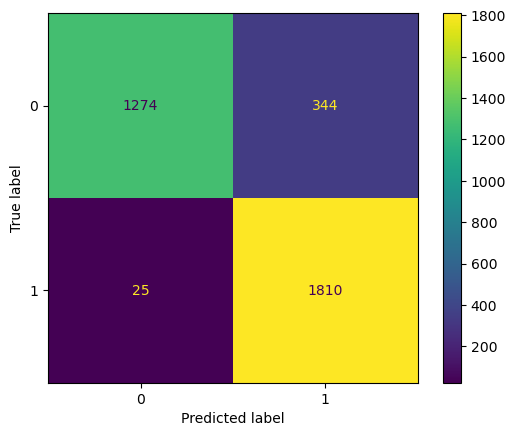

In [7]:
predictions = bagging.predict(test_set)

cm = confusion_matrix(test_label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [8]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

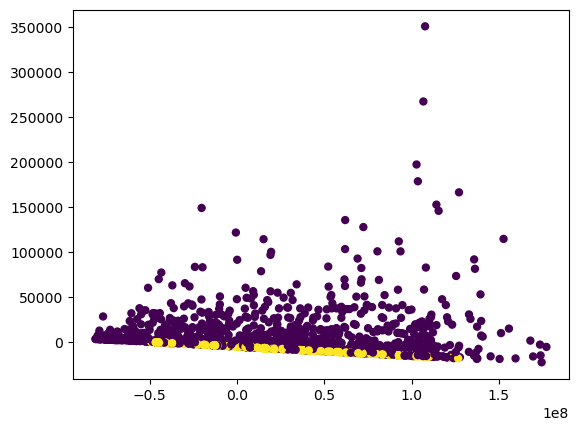

In [9]:
#true labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label, s=25);

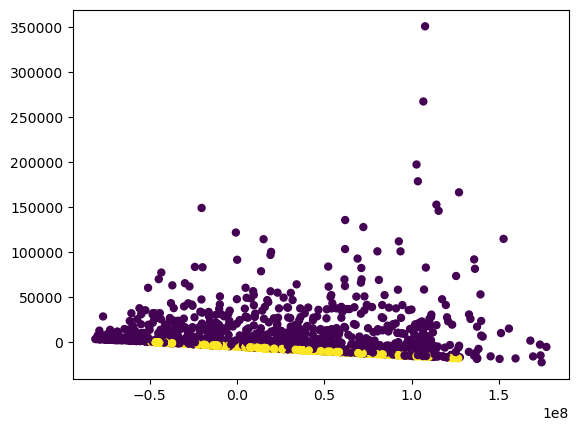

In [10]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred, s=25);

## Extremely Randomized Trees

In [ ]:
param_grid = {'max_features': ['sqrt', 'log2', None],
              'min_samples_split': [1, 2, 3, 4, 5],
              'min_samples_leaf': [1, 2, 3, 4],
              'n_estimators': np.arange(50, 200, 10),
              'ccp_alpha': [0, 0.1, 0.05, 0.3, 0.5],
              'min_weight_fraction_leaf': [0, 0.1, 0.05, 0.3, 0.5],
              'criterion' :['gini', 'entropy', 'log_loss']
             }

ert = ExtraTreesClassifier()

grid = GridSearchCV(
    ert,
    param_grid,
    cv=3,
    scoring='accuracy',
    return_train_score=False,
    verbose=4
)

grid.fit(train_set, train_label)

In [ ]:
ert = grid.best_estimator_
ert

In [ ]:
train_pred = ert.predict(train_set)
test_pred = ert.predict(test_set)

print_metrics(train_label, train_pred, test_label, test_pred)

In [ ]:
report_scores(test_label,test_pred)

In [ ]:
predictions = ert.predict(test_set)

cm = confusion_matrix(test_label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [ ]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

In [ ]:
#true labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label, s=25);

In [ ]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred, s=25);

## AdaBoost

In [12]:
param_grid = {'n_estimators': np.arange(5, 150, 5),
              'learning_rate': [0.8, 0.9, 1.0, 1.1, 1.2],
              'algorithm': ['SAMME', 'SAMME.R'],
             }

ada = AdaBoostClassifier()

grid = GridSearchCV(
    ada,
    param_grid,
    cv=3,
    scoring='accuracy',
    return_train_score=False,
    verbose=4
)

grid.fit(train_set, train_label)

Fitting 3 folds for each of 290 candidates, totalling 870 fits
[CV 1/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=5;, score=0.854 total time=   0.0s
[CV 2/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=5;, score=0.859 total time=   0.0s
[CV 3/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=5;, score=0.852 total time=   0.0s
[CV 1/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=10;, score=0.854 total time=   0.1s
[CV 2/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=10;, score=0.859 total time=   0.1s
[CV 3/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=10;, score=0.852 total time=   0.1s
[CV 1/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=15;, score=0.891 total time=   0.1s
[CV 2/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=15;, score=0.900 total time=   0.1s
[CV 3/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=15;, score=0.859 total time=   0.1s
[CV 1/3] END algorithm=SAMME, learning_rate=0.8, n_estimat

[CV 3/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=140;, score=0.893 total time=   0.8s
[CV 1/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=145;, score=0.893 total time=   0.8s
[CV 2/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=145;, score=0.901 total time=   0.8s
[CV 3/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=145;, score=0.893 total time=   0.8s
[CV 1/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=5;, score=0.854 total time=   0.0s
[CV 2/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=5;, score=0.859 total time=   0.0s
[CV 3/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=5;, score=0.852 total time=   0.0s
[CV 1/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=10;, score=0.891 total time=   0.1s
[CV 2/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=10;, score=0.900 total time=   0.1s
[CV 3/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=10;, score=0.852 total time=   0.1s
[CV 1/3] END algori

[CV 3/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=135;, score=0.894 total time=   0.7s
[CV 1/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=140;, score=0.894 total time=   0.8s
[CV 2/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=140;, score=0.902 total time=   0.8s
[CV 3/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=140;, score=0.894 total time=   0.8s
[CV 1/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=145;, score=0.894 total time=   0.8s
[CV 2/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=145;, score=0.902 total time=   0.8s
[CV 3/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=145;, score=0.894 total time=   0.8s
[CV 1/3] END algorithm=SAMME, learning_rate=1.0, n_estimators=5;, score=0.854 total time=   0.0s
[CV 2/3] END algorithm=SAMME, learning_rate=1.0, n_estimators=5;, score=0.859 total time=   0.0s
[CV 3/3] END algorithm=SAMME, learning_rate=1.0, n_estimators=5;, score=0.852 total time=   0.0s
[CV 1/3] END alg

[CV 3/3] END algorithm=SAMME, learning_rate=1.0, n_estimators=130;, score=0.894 total time=   0.8s
[CV 1/3] END algorithm=SAMME, learning_rate=1.0, n_estimators=135;, score=0.894 total time=   0.8s
[CV 2/3] END algorithm=SAMME, learning_rate=1.0, n_estimators=135;, score=0.904 total time=   0.8s
[CV 3/3] END algorithm=SAMME, learning_rate=1.0, n_estimators=135;, score=0.893 total time=   0.8s
[CV 1/3] END algorithm=SAMME, learning_rate=1.0, n_estimators=140;, score=0.894 total time=   0.8s
[CV 2/3] END algorithm=SAMME, learning_rate=1.0, n_estimators=140;, score=0.904 total time=   0.8s
[CV 3/3] END algorithm=SAMME, learning_rate=1.0, n_estimators=140;, score=0.894 total time=   0.8s
[CV 1/3] END algorithm=SAMME, learning_rate=1.0, n_estimators=145;, score=0.894 total time=   0.8s
[CV 2/3] END algorithm=SAMME, learning_rate=1.0, n_estimators=145;, score=0.904 total time=   0.8s
[CV 3/3] END algorithm=SAMME, learning_rate=1.0, n_estimators=145;, score=0.894 total time=   0.8s
[CV 1/3] E

[CV 3/3] END algorithm=SAMME, learning_rate=1.1, n_estimators=125;, score=0.892 total time=   0.7s
[CV 1/3] END algorithm=SAMME, learning_rate=1.1, n_estimators=130;, score=0.894 total time=   0.7s
[CV 2/3] END algorithm=SAMME, learning_rate=1.1, n_estimators=130;, score=0.905 total time=   0.7s
[CV 3/3] END algorithm=SAMME, learning_rate=1.1, n_estimators=130;, score=0.893 total time=   0.7s
[CV 1/3] END algorithm=SAMME, learning_rate=1.1, n_estimators=135;, score=0.895 total time=   0.8s
[CV 2/3] END algorithm=SAMME, learning_rate=1.1, n_estimators=135;, score=0.905 total time=   0.7s
[CV 3/3] END algorithm=SAMME, learning_rate=1.1, n_estimators=135;, score=0.893 total time=   0.7s
[CV 1/3] END algorithm=SAMME, learning_rate=1.1, n_estimators=140;, score=0.895 total time=   0.8s
[CV 2/3] END algorithm=SAMME, learning_rate=1.1, n_estimators=140;, score=0.905 total time=   0.8s
[CV 3/3] END algorithm=SAMME, learning_rate=1.1, n_estimators=140;, score=0.893 total time=   0.8s
[CV 1/3] E

[CV 3/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=120;, score=0.892 total time=   0.7s
[CV 1/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=125;, score=0.895 total time=   0.7s
[CV 2/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=125;, score=0.905 total time=   0.7s
[CV 3/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=125;, score=0.892 total time=   0.7s
[CV 1/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=130;, score=0.895 total time=   0.7s
[CV 2/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=130;, score=0.904 total time=   0.7s
[CV 3/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=130;, score=0.892 total time=   0.7s
[CV 1/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=135;, score=0.896 total time=   0.7s
[CV 2/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=135;, score=0.905 total time=   0.7s
[CV 3/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=135;, score=0.892 total time=   0.7s
[CV 1/3] E

[CV 2/3] END algorithm=SAMME.R, learning_rate=0.8, n_estimators=115;, score=0.900 total time=   0.7s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.8, n_estimators=115;, score=0.892 total time=   0.7s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.8, n_estimators=120;, score=0.891 total time=   0.7s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.8, n_estimators=120;, score=0.901 total time=   0.7s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.8, n_estimators=120;, score=0.892 total time=   0.7s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.8, n_estimators=125;, score=0.890 total time=   0.7s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.8, n_estimators=125;, score=0.902 total time=   0.7s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.8, n_estimators=125;, score=0.891 total time=   0.7s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.8, n_estimators=130;, score=0.889 total time=   0.8s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.8, n_estimators=130;, score=0.901 total tim

[CV 3/3] END algorithm=SAMME.R, learning_rate=0.9, n_estimators=105;, score=0.892 total time=   0.6s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.9, n_estimators=110;, score=0.889 total time=   0.7s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.9, n_estimators=110;, score=0.898 total time=   0.7s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.9, n_estimators=110;, score=0.892 total time=   0.7s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.9, n_estimators=115;, score=0.891 total time=   0.7s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.9, n_estimators=115;, score=0.898 total time=   0.7s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.9, n_estimators=115;, score=0.892 total time=   0.7s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.9, n_estimators=120;, score=0.889 total time=   0.7s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.9, n_estimators=120;, score=0.898 total time=   0.7s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.9, n_estimators=120;, score=0.891 total tim

[CV 1/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=100;, score=0.889 total time=   0.6s
[CV 2/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=100;, score=0.898 total time=   0.6s
[CV 3/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=100;, score=0.892 total time=   0.6s
[CV 1/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=105;, score=0.889 total time=   0.6s
[CV 2/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=105;, score=0.898 total time=   0.6s
[CV 3/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=105;, score=0.891 total time=   0.6s
[CV 1/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=110;, score=0.890 total time=   0.6s
[CV 2/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=110;, score=0.898 total time=   0.6s
[CV 3/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=110;, score=0.891 total time=   0.6s
[CV 1/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=115;, score=0.889 total tim

[CV 2/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=90;, score=0.899 total time=   0.5s
[CV 3/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=90;, score=0.889 total time=   0.5s
[CV 1/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=95;, score=0.889 total time=   0.6s
[CV 2/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=95;, score=0.899 total time=   0.6s
[CV 3/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=95;, score=0.889 total time=   0.6s
[CV 1/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=100;, score=0.890 total time=   0.6s
[CV 2/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=100;, score=0.898 total time=   0.6s
[CV 3/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=100;, score=0.889 total time=   0.6s
[CV 1/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=105;, score=0.891 total time=   0.6s
[CV 2/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=105;, score=0.899 total time=   

[CV 3/3] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=80;, score=0.889 total time=   0.5s
[CV 1/3] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=85;, score=0.888 total time=   0.5s
[CV 2/3] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=85;, score=0.898 total time=   0.5s
[CV 3/3] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=85;, score=0.889 total time=   0.5s
[CV 1/3] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=90;, score=0.889 total time=   0.5s
[CV 2/3] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=90;, score=0.899 total time=   0.5s
[CV 3/3] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=90;, score=0.889 total time=   0.5s
[CV 1/3] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=95;, score=0.888 total time=   0.6s
[CV 2/3] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=95;, score=0.899 total time=   0.6s
[CV 3/3] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=95;, score=0.889 total time=   0.6s


GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.8, 0.9, 1.0, 1.1, 1.2],
                         'n_estimators': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145])},
             scoring='accuracy', verbose=4)

In [13]:
ada = grid.best_estimator_
ada

AdaBoostClassifier(algorithm='SAMME', learning_rate=1.2, n_estimators=145)

In [14]:
train_pred = ada.predict(train_set)
test_pred = ada.predict(test_set)

print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  0.8988206083178151
Accuracy test set  0.8954532290761656
Precision train set  0.9133896991464294
Recall train set  0.8988206083178151
F1 score train set  0.8972242700774384
Support train set  (array([0.99366033, 0.84262554]), array([0.7890832 , 0.99556178]), array([0.87963373, 0.91273156]), array([3774, 4281]))


In [15]:
report_scores(test_label,test_pred)

              precision    recall  f1-score   support

        <=50       1.00      0.78      0.87      1618
         >50       0.84      1.00      0.91      1835

    accuracy                           0.90      3453
   macro avg       0.92      0.89      0.89      3453
weighted avg       0.91      0.90      0.89      3453



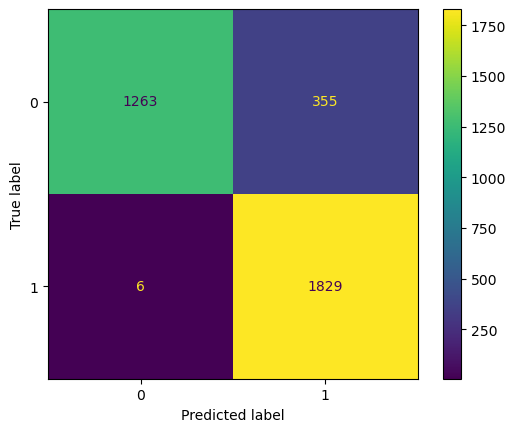

In [16]:
predictions = ada.predict(test_set)

cm = confusion_matrix(test_label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [17]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

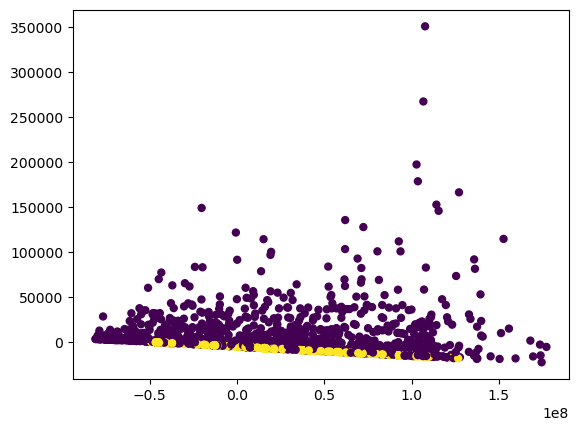

In [18]:
#true labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label, s=25);

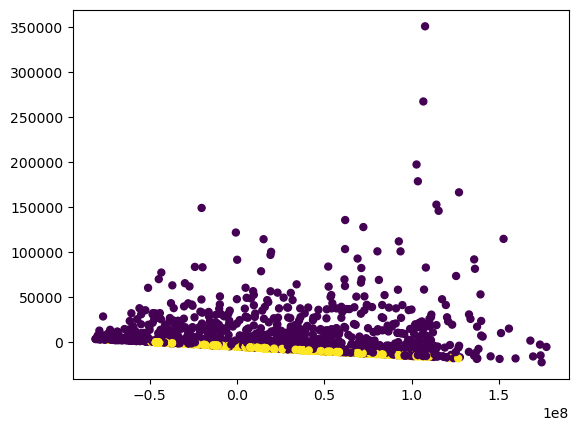

In [19]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred, s=25);

## Gradient Tree Boosting

In [ ]:
param_grid = {
    
             }

gbc = GradientBoostingClassifier()

grid = GridSearchCV(
    gbc,
    param_grid,
    cv=3,
    scoring='accuracy',
    return_train_score=False,
    verbose=4
)

grid.fit(train_set, train_label)

In [ ]:
gbc = grid.best_estimator_
gbc

In [ ]:
train_pred = gbc.predict(train_set)
test_pred = gbc.predict(test_set)

print_metrics(train_label, train_pred, test_label, test_pred)

In [ ]:
report_scores(test_label,test_pred)

In [ ]:
predictions = gbc.predict(test_set)

cm = confusion_matrix(test_label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [ ]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

In [ ]:
#true labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label, s=25);

In [ ]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred, s=25);

##  Histogram-Based Gradient Boosting

In [ ]:
param_grid = {
    
             }

hgbc = HistGradientBoostingClassifier()

grid = GridSearchCV(
    hgbc,
    param_grid,
    cv=3,
    scoring='accuracy',
    return_train_score=False,
    verbose=4
)

grid.fit(train_set, train_label)

In [ ]:
hgbc = grid.best_estimator_
hgbc

In [ ]:
train_pred = hgbc.predict(train_set)
test_pred = hgbc.predict(test_set)

print_metrics(train_label, train_pred, test_label, test_pred)

In [ ]:
report_scores(test_label,test_pred)

In [ ]:
predictions = hgbc.predict(test_set)

cm = confusion_matrix(test_label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [ ]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

In [ ]:
#true labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label, s=25);

In [ ]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred, s=25);

## Save models

In [20]:
with open("models_checkpoints/bagging_lang.bin", "wb") as f:
    pickle.dump(bagging, f)
    
with open("models_checkpoints/adaboost_lang.bin", "wb") as f:
    pickle.dump(ada, f)

## Removed "lang" attribute for classification

In [21]:
data = pd.read_csv("dataset/cleaned_user_profiles.csv", index_col=0)
data.drop(columns=['lang'])
train_set, test_set, train_label, test_label = prepare_data(data)

Classification features : ['created_at', 'statuses_count', 'avg_length', 'avg_special_chars', 'urls_ratio', 'mentions_ratio', 'hashtags_ratio', 'reply_count_mean', 'reply_count_std', 'favorite_count_mean', 'favorite_count_std', 'favorite_count_entropy', 'retweet_count_mean', 'retweet_count_std']


## Bagging

In [22]:
param_grid = {
                'n_estimators': np.arange(2, 40, 1),
                'max_features': [0.7, 0.8, 0.85, 0.9, 1.0],
                'max_samples': [0.7, 0.8, 0.85, 0.9, 1.0]
             }

bagging = BaggingClassifier()

grid = GridSearchCV(
    bagging,
    param_grid,
    cv=3,
    scoring='accuracy',
    return_train_score=False,
    verbose=4
)

grid.fit(train_set, train_label)

Fitting 3 folds for each of 950 candidates, totalling 2850 fits
[CV 1/3] END max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.803 total time=   0.0s
[CV 2/3] END max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.754 total time=   0.0s
[CV 3/3] END max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.810 total time=   0.0s
[CV 1/3] END max_features=0.7, max_samples=0.7, n_estimators=3;, score=0.745 total time=   0.1s
[CV 2/3] END max_features=0.7, max_samples=0.7, n_estimators=3;, score=0.858 total time=   0.0s
[CV 3/3] END max_features=0.7, max_samples=0.7, n_estimators=3;, score=0.800 total time=   0.1s
[CV 1/3] END max_features=0.7, max_samples=0.7, n_estimators=4;, score=0.829 total time=   0.1s
[CV 2/3] END max_features=0.7, max_samples=0.7, n_estimators=4;, score=0.831 total time=   0.1s
[CV 3/3] END max_features=0.7, max_samples=0.7, n_estimators=4;, score=0.858 total time=   0.0s
[CV 1/3] END max_features=0.7, max_samples=0.7, n_estimators=5;, score=0

[CV 2/3] END max_features=0.7, max_samples=0.7, n_estimators=30;, score=0.893 total time=   0.3s
[CV 3/3] END max_features=0.7, max_samples=0.7, n_estimators=30;, score=0.900 total time=   0.4s
[CV 1/3] END max_features=0.7, max_samples=0.7, n_estimators=31;, score=0.890 total time=   0.4s
[CV 2/3] END max_features=0.7, max_samples=0.7, n_estimators=31;, score=0.895 total time=   0.4s
[CV 3/3] END max_features=0.7, max_samples=0.7, n_estimators=31;, score=0.896 total time=   0.4s
[CV 1/3] END max_features=0.7, max_samples=0.7, n_estimators=32;, score=0.882 total time=   0.4s
[CV 2/3] END max_features=0.7, max_samples=0.7, n_estimators=32;, score=0.882 total time=   0.4s
[CV 3/3] END max_features=0.7, max_samples=0.7, n_estimators=32;, score=0.896 total time=   0.4s
[CV 1/3] END max_features=0.7, max_samples=0.7, n_estimators=33;, score=0.888 total time=   0.4s
[CV 2/3] END max_features=0.7, max_samples=0.7, n_estimators=33;, score=0.890 total time=   0.4s
[CV 3/3] END max_features=0.7,

[CV 3/3] END max_features=0.7, max_samples=0.8, n_estimators=20;, score=0.892 total time=   0.3s
[CV 1/3] END max_features=0.7, max_samples=0.8, n_estimators=21;, score=0.892 total time=   0.3s
[CV 2/3] END max_features=0.7, max_samples=0.8, n_estimators=21;, score=0.870 total time=   0.3s
[CV 3/3] END max_features=0.7, max_samples=0.8, n_estimators=21;, score=0.893 total time=   0.3s
[CV 1/3] END max_features=0.7, max_samples=0.8, n_estimators=22;, score=0.886 total time=   0.3s
[CV 2/3] END max_features=0.7, max_samples=0.8, n_estimators=22;, score=0.883 total time=   0.3s
[CV 3/3] END max_features=0.7, max_samples=0.8, n_estimators=22;, score=0.889 total time=   0.3s
[CV 1/3] END max_features=0.7, max_samples=0.8, n_estimators=23;, score=0.885 total time=   0.3s
[CV 2/3] END max_features=0.7, max_samples=0.8, n_estimators=23;, score=0.892 total time=   0.3s
[CV 3/3] END max_features=0.7, max_samples=0.8, n_estimators=23;, score=0.895 total time=   0.3s
[CV 1/3] END max_features=0.7,

[CV 1/3] END max_features=0.7, max_samples=0.85, n_estimators=11;, score=0.880 total time=   0.2s
[CV 2/3] END max_features=0.7, max_samples=0.85, n_estimators=11;, score=0.874 total time=   0.2s
[CV 3/3] END max_features=0.7, max_samples=0.85, n_estimators=11;, score=0.884 total time=   0.2s
[CV 1/3] END max_features=0.7, max_samples=0.85, n_estimators=12;, score=0.869 total time=   0.2s
[CV 2/3] END max_features=0.7, max_samples=0.85, n_estimators=12;, score=0.880 total time=   0.2s
[CV 3/3] END max_features=0.7, max_samples=0.85, n_estimators=12;, score=0.888 total time=   0.2s
[CV 1/3] END max_features=0.7, max_samples=0.85, n_estimators=13;, score=0.885 total time=   0.2s
[CV 2/3] END max_features=0.7, max_samples=0.85, n_estimators=13;, score=0.880 total time=   0.2s
[CV 3/3] END max_features=0.7, max_samples=0.85, n_estimators=13;, score=0.891 total time=   0.2s
[CV 1/3] END max_features=0.7, max_samples=0.85, n_estimators=14;, score=0.875 total time=   0.2s
[CV 2/3] END max_fea

[CV 1/3] END max_features=0.7, max_samples=0.85, n_estimators=39;, score=0.888 total time=   0.6s
[CV 2/3] END max_features=0.7, max_samples=0.85, n_estimators=39;, score=0.892 total time=   0.6s
[CV 3/3] END max_features=0.7, max_samples=0.85, n_estimators=39;, score=0.899 total time=   0.6s
[CV 1/3] END max_features=0.7, max_samples=0.9, n_estimators=2;, score=0.818 total time=   0.0s
[CV 2/3] END max_features=0.7, max_samples=0.9, n_estimators=2;, score=0.818 total time=   0.0s
[CV 3/3] END max_features=0.7, max_samples=0.9, n_estimators=2;, score=0.762 total time=   0.0s
[CV 1/3] END max_features=0.7, max_samples=0.9, n_estimators=3;, score=0.859 total time=   0.0s
[CV 2/3] END max_features=0.7, max_samples=0.9, n_estimators=3;, score=0.862 total time=   0.1s
[CV 3/3] END max_features=0.7, max_samples=0.9, n_estimators=3;, score=0.870 total time=   0.0s
[CV 1/3] END max_features=0.7, max_samples=0.9, n_estimators=4;, score=0.807 total time=   0.1s
[CV 2/3] END max_features=0.7, max

[CV 2/3] END max_features=0.7, max_samples=0.9, n_estimators=29;, score=0.888 total time=   0.4s
[CV 3/3] END max_features=0.7, max_samples=0.9, n_estimators=29;, score=0.900 total time=   0.4s
[CV 1/3] END max_features=0.7, max_samples=0.9, n_estimators=30;, score=0.880 total time=   0.5s
[CV 2/3] END max_features=0.7, max_samples=0.9, n_estimators=30;, score=0.891 total time=   0.4s
[CV 3/3] END max_features=0.7, max_samples=0.9, n_estimators=30;, score=0.895 total time=   0.5s
[CV 1/3] END max_features=0.7, max_samples=0.9, n_estimators=31;, score=0.885 total time=   0.5s
[CV 2/3] END max_features=0.7, max_samples=0.9, n_estimators=31;, score=0.883 total time=   0.5s
[CV 3/3] END max_features=0.7, max_samples=0.9, n_estimators=31;, score=0.896 total time=   0.5s
[CV 1/3] END max_features=0.7, max_samples=0.9, n_estimators=32;, score=0.890 total time=   0.5s
[CV 2/3] END max_features=0.7, max_samples=0.9, n_estimators=32;, score=0.886 total time=   0.5s
[CV 3/3] END max_features=0.7,

[CV 3/3] END max_features=0.7, max_samples=1.0, n_estimators=19;, score=0.896 total time=   0.3s
[CV 1/3] END max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.823 total time=   0.4s
[CV 2/3] END max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.885 total time=   0.3s
[CV 3/3] END max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.880 total time=   0.4s
[CV 1/3] END max_features=0.7, max_samples=1.0, n_estimators=21;, score=0.888 total time=   0.3s
[CV 2/3] END max_features=0.7, max_samples=1.0, n_estimators=21;, score=0.881 total time=   0.4s
[CV 3/3] END max_features=0.7, max_samples=1.0, n_estimators=21;, score=0.899 total time=   0.3s
[CV 1/3] END max_features=0.7, max_samples=1.0, n_estimators=22;, score=0.881 total time=   0.3s
[CV 2/3] END max_features=0.7, max_samples=1.0, n_estimators=22;, score=0.886 total time=   0.4s
[CV 3/3] END max_features=0.7, max_samples=1.0, n_estimators=22;, score=0.874 total time=   0.4s
[CV 1/3] END max_features=0.7,

[CV 1/3] END max_features=0.8, max_samples=0.7, n_estimators=10;, score=0.870 total time=   0.1s
[CV 2/3] END max_features=0.8, max_samples=0.7, n_estimators=10;, score=0.877 total time=   0.1s
[CV 3/3] END max_features=0.8, max_samples=0.7, n_estimators=10;, score=0.875 total time=   0.1s
[CV 1/3] END max_features=0.8, max_samples=0.7, n_estimators=11;, score=0.878 total time=   0.1s
[CV 2/3] END max_features=0.8, max_samples=0.7, n_estimators=11;, score=0.884 total time=   0.1s
[CV 3/3] END max_features=0.8, max_samples=0.7, n_estimators=11;, score=0.889 total time=   0.1s
[CV 1/3] END max_features=0.8, max_samples=0.7, n_estimators=12;, score=0.877 total time=   0.2s
[CV 2/3] END max_features=0.8, max_samples=0.7, n_estimators=12;, score=0.870 total time=   0.2s
[CV 3/3] END max_features=0.8, max_samples=0.7, n_estimators=12;, score=0.883 total time=   0.2s
[CV 1/3] END max_features=0.8, max_samples=0.7, n_estimators=13;, score=0.880 total time=   0.2s
[CV 2/3] END max_features=0.8,

[CV 2/3] END max_features=0.8, max_samples=0.7, n_estimators=38;, score=0.888 total time=   0.6s
[CV 3/3] END max_features=0.8, max_samples=0.7, n_estimators=38;, score=0.898 total time=   0.5s
[CV 1/3] END max_features=0.8, max_samples=0.7, n_estimators=39;, score=0.888 total time=   0.5s
[CV 2/3] END max_features=0.8, max_samples=0.7, n_estimators=39;, score=0.892 total time=   0.5s
[CV 3/3] END max_features=0.8, max_samples=0.7, n_estimators=39;, score=0.901 total time=   0.6s
[CV 1/3] END max_features=0.8, max_samples=0.8, n_estimators=2;, score=0.798 total time=   0.0s
[CV 2/3] END max_features=0.8, max_samples=0.8, n_estimators=2;, score=0.823 total time=   0.0s
[CV 3/3] END max_features=0.8, max_samples=0.8, n_estimators=2;, score=0.765 total time=   0.0s
[CV 1/3] END max_features=0.8, max_samples=0.8, n_estimators=3;, score=0.859 total time=   0.1s
[CV 2/3] END max_features=0.8, max_samples=0.8, n_estimators=3;, score=0.867 total time=   0.0s
[CV 3/3] END max_features=0.8, max_

[CV 3/3] END max_features=0.8, max_samples=0.8, n_estimators=28;, score=0.896 total time=   0.4s
[CV 1/3] END max_features=0.8, max_samples=0.8, n_estimators=29;, score=0.884 total time=   0.5s
[CV 2/3] END max_features=0.8, max_samples=0.8, n_estimators=29;, score=0.892 total time=   0.5s
[CV 3/3] END max_features=0.8, max_samples=0.8, n_estimators=29;, score=0.896 total time=   0.5s
[CV 1/3] END max_features=0.8, max_samples=0.8, n_estimators=30;, score=0.888 total time=   0.4s
[CV 2/3] END max_features=0.8, max_samples=0.8, n_estimators=30;, score=0.887 total time=   0.5s
[CV 3/3] END max_features=0.8, max_samples=0.8, n_estimators=30;, score=0.899 total time=   0.4s
[CV 1/3] END max_features=0.8, max_samples=0.8, n_estimators=31;, score=0.885 total time=   0.5s
[CV 2/3] END max_features=0.8, max_samples=0.8, n_estimators=31;, score=0.891 total time=   0.5s
[CV 3/3] END max_features=0.8, max_samples=0.8, n_estimators=31;, score=0.897 total time=   0.5s
[CV 1/3] END max_features=0.8,

[CV 1/3] END max_features=0.8, max_samples=0.85, n_estimators=19;, score=0.883 total time=   0.4s
[CV 2/3] END max_features=0.8, max_samples=0.85, n_estimators=19;, score=0.890 total time=   0.3s
[CV 3/3] END max_features=0.8, max_samples=0.85, n_estimators=19;, score=0.893 total time=   0.3s
[CV 1/3] END max_features=0.8, max_samples=0.85, n_estimators=20;, score=0.885 total time=   0.3s
[CV 2/3] END max_features=0.8, max_samples=0.85, n_estimators=20;, score=0.887 total time=   0.3s
[CV 3/3] END max_features=0.8, max_samples=0.85, n_estimators=20;, score=0.888 total time=   0.3s
[CV 1/3] END max_features=0.8, max_samples=0.85, n_estimators=21;, score=0.881 total time=   0.4s
[CV 2/3] END max_features=0.8, max_samples=0.85, n_estimators=21;, score=0.886 total time=   0.4s
[CV 3/3] END max_features=0.8, max_samples=0.85, n_estimators=21;, score=0.898 total time=   0.3s
[CV 1/3] END max_features=0.8, max_samples=0.85, n_estimators=22;, score=0.888 total time=   0.4s
[CV 2/3] END max_fea

[CV 2/3] END max_features=0.8, max_samples=0.9, n_estimators=9;, score=0.880 total time=   0.2s
[CV 3/3] END max_features=0.8, max_samples=0.9, n_estimators=9;, score=0.881 total time=   0.2s
[CV 1/3] END max_features=0.8, max_samples=0.9, n_estimators=10;, score=0.866 total time=   0.2s
[CV 2/3] END max_features=0.8, max_samples=0.9, n_estimators=10;, score=0.878 total time=   0.2s
[CV 3/3] END max_features=0.8, max_samples=0.9, n_estimators=10;, score=0.875 total time=   0.2s
[CV 1/3] END max_features=0.8, max_samples=0.9, n_estimators=11;, score=0.877 total time=   0.2s
[CV 2/3] END max_features=0.8, max_samples=0.9, n_estimators=11;, score=0.881 total time=   0.2s
[CV 3/3] END max_features=0.8, max_samples=0.9, n_estimators=11;, score=0.887 total time=   0.2s
[CV 1/3] END max_features=0.8, max_samples=0.9, n_estimators=12;, score=0.880 total time=   0.2s
[CV 2/3] END max_features=0.8, max_samples=0.9, n_estimators=12;, score=0.876 total time=   0.2s
[CV 3/3] END max_features=0.8, m

[CV 3/3] END max_features=0.8, max_samples=0.9, n_estimators=37;, score=0.899 total time=   0.7s
[CV 1/3] END max_features=0.8, max_samples=0.9, n_estimators=38;, score=0.888 total time=   0.7s
[CV 2/3] END max_features=0.8, max_samples=0.9, n_estimators=38;, score=0.888 total time=   0.7s
[CV 3/3] END max_features=0.8, max_samples=0.9, n_estimators=38;, score=0.894 total time=   0.7s
[CV 1/3] END max_features=0.8, max_samples=0.9, n_estimators=39;, score=0.890 total time=   0.7s
[CV 2/3] END max_features=0.8, max_samples=0.9, n_estimators=39;, score=0.892 total time=   0.6s
[CV 3/3] END max_features=0.8, max_samples=0.9, n_estimators=39;, score=0.901 total time=   0.6s
[CV 1/3] END max_features=0.8, max_samples=1.0, n_estimators=2;, score=0.799 total time=   0.0s
[CV 2/3] END max_features=0.8, max_samples=1.0, n_estimators=2;, score=0.818 total time=   0.0s
[CV 3/3] END max_features=0.8, max_samples=1.0, n_estimators=2;, score=0.824 total time=   0.0s
[CV 1/3] END max_features=0.8, ma

[CV 1/3] END max_features=0.8, max_samples=1.0, n_estimators=28;, score=0.886 total time=   0.5s
[CV 2/3] END max_features=0.8, max_samples=1.0, n_estimators=28;, score=0.892 total time=   0.5s
[CV 3/3] END max_features=0.8, max_samples=1.0, n_estimators=28;, score=0.895 total time=   0.5s
[CV 1/3] END max_features=0.8, max_samples=1.0, n_estimators=29;, score=0.887 total time=   0.6s
[CV 2/3] END max_features=0.8, max_samples=1.0, n_estimators=29;, score=0.889 total time=   0.5s
[CV 3/3] END max_features=0.8, max_samples=1.0, n_estimators=29;, score=0.897 total time=   0.5s
[CV 1/3] END max_features=0.8, max_samples=1.0, n_estimators=30;, score=0.885 total time=   0.5s
[CV 2/3] END max_features=0.8, max_samples=1.0, n_estimators=30;, score=0.891 total time=   0.5s
[CV 3/3] END max_features=0.8, max_samples=1.0, n_estimators=30;, score=0.894 total time=   0.5s
[CV 1/3] END max_features=0.8, max_samples=1.0, n_estimators=31;, score=0.886 total time=   0.5s
[CV 2/3] END max_features=0.8,

[CV 2/3] END max_features=0.85, max_samples=0.7, n_estimators=18;, score=0.883 total time=   0.2s
[CV 3/3] END max_features=0.85, max_samples=0.7, n_estimators=18;, score=0.892 total time=   0.2s
[CV 1/3] END max_features=0.85, max_samples=0.7, n_estimators=19;, score=0.887 total time=   0.3s
[CV 2/3] END max_features=0.85, max_samples=0.7, n_estimators=19;, score=0.890 total time=   0.3s
[CV 3/3] END max_features=0.85, max_samples=0.7, n_estimators=19;, score=0.892 total time=   0.3s
[CV 1/3] END max_features=0.85, max_samples=0.7, n_estimators=20;, score=0.880 total time=   0.3s
[CV 2/3] END max_features=0.85, max_samples=0.7, n_estimators=20;, score=0.886 total time=   0.3s
[CV 3/3] END max_features=0.85, max_samples=0.7, n_estimators=20;, score=0.891 total time=   0.3s
[CV 1/3] END max_features=0.85, max_samples=0.7, n_estimators=21;, score=0.883 total time=   0.3s
[CV 2/3] END max_features=0.85, max_samples=0.7, n_estimators=21;, score=0.888 total time=   0.3s
[CV 3/3] END max_fea

[CV 3/3] END max_features=0.85, max_samples=0.8, n_estimators=8;, score=0.877 total time=   0.1s
[CV 1/3] END max_features=0.85, max_samples=0.8, n_estimators=9;, score=0.878 total time=   0.1s
[CV 2/3] END max_features=0.85, max_samples=0.8, n_estimators=9;, score=0.884 total time=   0.1s
[CV 3/3] END max_features=0.85, max_samples=0.8, n_estimators=9;, score=0.889 total time=   0.1s
[CV 1/3] END max_features=0.85, max_samples=0.8, n_estimators=10;, score=0.874 total time=   0.2s
[CV 2/3] END max_features=0.85, max_samples=0.8, n_estimators=10;, score=0.870 total time=   0.2s
[CV 3/3] END max_features=0.85, max_samples=0.8, n_estimators=10;, score=0.881 total time=   0.2s
[CV 1/3] END max_features=0.85, max_samples=0.8, n_estimators=11;, score=0.876 total time=   0.2s
[CV 2/3] END max_features=0.85, max_samples=0.8, n_estimators=11;, score=0.880 total time=   0.2s
[CV 3/3] END max_features=0.85, max_samples=0.8, n_estimators=11;, score=0.886 total time=   0.2s
[CV 1/3] END max_feature

[CV 3/3] END max_features=0.85, max_samples=0.8, n_estimators=36;, score=0.898 total time=   0.5s
[CV 1/3] END max_features=0.85, max_samples=0.8, n_estimators=37;, score=0.891 total time=   0.5s
[CV 2/3] END max_features=0.85, max_samples=0.8, n_estimators=37;, score=0.897 total time=   0.6s
[CV 3/3] END max_features=0.85, max_samples=0.8, n_estimators=37;, score=0.900 total time=   0.6s
[CV 1/3] END max_features=0.85, max_samples=0.8, n_estimators=38;, score=0.885 total time=   0.6s
[CV 2/3] END max_features=0.85, max_samples=0.8, n_estimators=38;, score=0.891 total time=   0.6s
[CV 3/3] END max_features=0.85, max_samples=0.8, n_estimators=38;, score=0.896 total time=   0.6s
[CV 1/3] END max_features=0.85, max_samples=0.8, n_estimators=39;, score=0.889 total time=   0.7s
[CV 2/3] END max_features=0.85, max_samples=0.8, n_estimators=39;, score=0.892 total time=   0.6s
[CV 3/3] END max_features=0.85, max_samples=0.8, n_estimators=39;, score=0.899 total time=   0.6s
[CV 1/3] END max_fea

[CV 3/3] END max_features=0.85, max_samples=0.85, n_estimators=26;, score=0.892 total time=   0.4s
[CV 1/3] END max_features=0.85, max_samples=0.85, n_estimators=27;, score=0.892 total time=   0.5s
[CV 2/3] END max_features=0.85, max_samples=0.85, n_estimators=27;, score=0.892 total time=   0.5s
[CV 3/3] END max_features=0.85, max_samples=0.85, n_estimators=27;, score=0.897 total time=   0.5s
[CV 1/3] END max_features=0.85, max_samples=0.85, n_estimators=28;, score=0.887 total time=   0.5s
[CV 2/3] END max_features=0.85, max_samples=0.85, n_estimators=28;, score=0.893 total time=   0.4s
[CV 3/3] END max_features=0.85, max_samples=0.85, n_estimators=28;, score=0.893 total time=   0.5s
[CV 1/3] END max_features=0.85, max_samples=0.85, n_estimators=29;, score=0.886 total time=   0.5s
[CV 2/3] END max_features=0.85, max_samples=0.85, n_estimators=29;, score=0.891 total time=   0.5s
[CV 3/3] END max_features=0.85, max_samples=0.85, n_estimators=29;, score=0.899 total time=   0.5s
[CV 1/3] E

[CV 3/3] END max_features=0.85, max_samples=0.9, n_estimators=16;, score=0.885 total time=   0.3s
[CV 1/3] END max_features=0.85, max_samples=0.9, n_estimators=17;, score=0.884 total time=   0.3s
[CV 2/3] END max_features=0.85, max_samples=0.9, n_estimators=17;, score=0.888 total time=   0.3s
[CV 3/3] END max_features=0.85, max_samples=0.9, n_estimators=17;, score=0.894 total time=   0.3s
[CV 1/3] END max_features=0.85, max_samples=0.9, n_estimators=18;, score=0.881 total time=   0.3s
[CV 2/3] END max_features=0.85, max_samples=0.9, n_estimators=18;, score=0.883 total time=   0.3s
[CV 3/3] END max_features=0.85, max_samples=0.9, n_estimators=18;, score=0.893 total time=   0.3s
[CV 1/3] END max_features=0.85, max_samples=0.9, n_estimators=19;, score=0.889 total time=   0.3s
[CV 2/3] END max_features=0.85, max_samples=0.9, n_estimators=19;, score=0.886 total time=   0.3s
[CV 3/3] END max_features=0.85, max_samples=0.9, n_estimators=19;, score=0.898 total time=   0.3s
[CV 1/3] END max_fea

[CV 3/3] END max_features=0.85, max_samples=1.0, n_estimators=6;, score=0.871 total time=   0.1s
[CV 1/3] END max_features=0.85, max_samples=1.0, n_estimators=7;, score=0.881 total time=   0.1s
[CV 2/3] END max_features=0.85, max_samples=1.0, n_estimators=7;, score=0.865 total time=   0.1s
[CV 3/3] END max_features=0.85, max_samples=1.0, n_estimators=7;, score=0.886 total time=   0.1s
[CV 1/3] END max_features=0.85, max_samples=1.0, n_estimators=8;, score=0.868 total time=   0.2s
[CV 2/3] END max_features=0.85, max_samples=1.0, n_estimators=8;, score=0.870 total time=   0.1s
[CV 3/3] END max_features=0.85, max_samples=1.0, n_estimators=8;, score=0.872 total time=   0.1s
[CV 1/3] END max_features=0.85, max_samples=1.0, n_estimators=9;, score=0.870 total time=   0.2s
[CV 2/3] END max_features=0.85, max_samples=1.0, n_estimators=9;, score=0.886 total time=   0.2s
[CV 3/3] END max_features=0.85, max_samples=1.0, n_estimators=9;, score=0.888 total time=   0.2s
[CV 1/3] END max_features=0.85

[CV 3/3] END max_features=0.85, max_samples=1.0, n_estimators=34;, score=0.892 total time=   0.6s
[CV 1/3] END max_features=0.85, max_samples=1.0, n_estimators=35;, score=0.885 total time=   0.7s
[CV 2/3] END max_features=0.85, max_samples=1.0, n_estimators=35;, score=0.888 total time=   0.6s
[CV 3/3] END max_features=0.85, max_samples=1.0, n_estimators=35;, score=0.899 total time=   0.6s
[CV 1/3] END max_features=0.85, max_samples=1.0, n_estimators=36;, score=0.888 total time=   0.7s
[CV 2/3] END max_features=0.85, max_samples=1.0, n_estimators=36;, score=0.888 total time=   0.6s
[CV 3/3] END max_features=0.85, max_samples=1.0, n_estimators=36;, score=0.900 total time=   0.6s
[CV 1/3] END max_features=0.85, max_samples=1.0, n_estimators=37;, score=0.889 total time=   0.7s
[CV 2/3] END max_features=0.85, max_samples=1.0, n_estimators=37;, score=0.893 total time=   0.7s
[CV 3/3] END max_features=0.85, max_samples=1.0, n_estimators=37;, score=0.900 total time=   0.7s
[CV 1/3] END max_fea

[CV 1/3] END max_features=0.9, max_samples=0.7, n_estimators=25;, score=0.886 total time=   0.4s
[CV 2/3] END max_features=0.9, max_samples=0.7, n_estimators=25;, score=0.892 total time=   0.4s
[CV 3/3] END max_features=0.9, max_samples=0.7, n_estimators=25;, score=0.895 total time=   0.4s
[CV 1/3] END max_features=0.9, max_samples=0.7, n_estimators=26;, score=0.891 total time=   0.4s
[CV 2/3] END max_features=0.9, max_samples=0.7, n_estimators=26;, score=0.888 total time=   0.4s
[CV 3/3] END max_features=0.9, max_samples=0.7, n_estimators=26;, score=0.894 total time=   0.4s
[CV 1/3] END max_features=0.9, max_samples=0.7, n_estimators=27;, score=0.886 total time=   0.4s
[CV 2/3] END max_features=0.9, max_samples=0.7, n_estimators=27;, score=0.892 total time=   0.4s
[CV 3/3] END max_features=0.9, max_samples=0.7, n_estimators=27;, score=0.896 total time=   0.4s
[CV 1/3] END max_features=0.9, max_samples=0.7, n_estimators=28;, score=0.887 total time=   0.4s
[CV 2/3] END max_features=0.9,

[CV 2/3] END max_features=0.9, max_samples=0.8, n_estimators=15;, score=0.886 total time=   0.2s
[CV 3/3] END max_features=0.9, max_samples=0.8, n_estimators=15;, score=0.896 total time=   0.2s
[CV 1/3] END max_features=0.9, max_samples=0.8, n_estimators=16;, score=0.884 total time=   0.2s
[CV 2/3] END max_features=0.9, max_samples=0.8, n_estimators=16;, score=0.884 total time=   0.2s
[CV 3/3] END max_features=0.9, max_samples=0.8, n_estimators=16;, score=0.894 total time=   0.2s
[CV 1/3] END max_features=0.9, max_samples=0.8, n_estimators=17;, score=0.889 total time=   0.3s
[CV 2/3] END max_features=0.9, max_samples=0.8, n_estimators=17;, score=0.881 total time=   0.3s
[CV 3/3] END max_features=0.9, max_samples=0.8, n_estimators=17;, score=0.894 total time=   0.3s
[CV 1/3] END max_features=0.9, max_samples=0.8, n_estimators=18;, score=0.880 total time=   0.3s
[CV 2/3] END max_features=0.9, max_samples=0.8, n_estimators=18;, score=0.885 total time=   0.3s
[CV 3/3] END max_features=0.9,

[CV 3/3] END max_features=0.9, max_samples=0.85, n_estimators=5;, score=0.873 total time=   0.1s
[CV 1/3] END max_features=0.9, max_samples=0.85, n_estimators=6;, score=0.854 total time=   0.1s
[CV 2/3] END max_features=0.9, max_samples=0.85, n_estimators=6;, score=0.860 total time=   0.1s
[CV 3/3] END max_features=0.9, max_samples=0.85, n_estimators=6;, score=0.862 total time=   0.1s
[CV 1/3] END max_features=0.9, max_samples=0.85, n_estimators=7;, score=0.876 total time=   0.1s
[CV 2/3] END max_features=0.9, max_samples=0.85, n_estimators=7;, score=0.878 total time=   0.1s
[CV 3/3] END max_features=0.9, max_samples=0.85, n_estimators=7;, score=0.879 total time=   0.1s
[CV 1/3] END max_features=0.9, max_samples=0.85, n_estimators=8;, score=0.872 total time=   0.1s
[CV 2/3] END max_features=0.9, max_samples=0.85, n_estimators=8;, score=0.872 total time=   0.1s
[CV 3/3] END max_features=0.9, max_samples=0.85, n_estimators=8;, score=0.874 total time=   0.1s
[CV 1/3] END max_features=0.9,

[CV 3/3] END max_features=0.9, max_samples=0.85, n_estimators=33;, score=0.898 total time=   0.5s
[CV 1/3] END max_features=0.9, max_samples=0.85, n_estimators=34;, score=0.882 total time=   0.6s
[CV 2/3] END max_features=0.9, max_samples=0.85, n_estimators=34;, score=0.893 total time=   0.6s
[CV 3/3] END max_features=0.9, max_samples=0.85, n_estimators=34;, score=0.895 total time=   0.6s
[CV 1/3] END max_features=0.9, max_samples=0.85, n_estimators=35;, score=0.887 total time=   0.6s
[CV 2/3] END max_features=0.9, max_samples=0.85, n_estimators=35;, score=0.894 total time=   0.6s
[CV 3/3] END max_features=0.9, max_samples=0.85, n_estimators=35;, score=0.900 total time=   0.5s
[CV 1/3] END max_features=0.9, max_samples=0.85, n_estimators=36;, score=0.888 total time=   0.6s
[CV 2/3] END max_features=0.9, max_samples=0.85, n_estimators=36;, score=0.892 total time=   0.6s
[CV 3/3] END max_features=0.9, max_samples=0.85, n_estimators=36;, score=0.895 total time=   0.6s
[CV 1/3] END max_fea

[CV 1/3] END max_features=0.9, max_samples=0.9, n_estimators=24;, score=0.885 total time=   0.4s
[CV 2/3] END max_features=0.9, max_samples=0.9, n_estimators=24;, score=0.891 total time=   0.4s
[CV 3/3] END max_features=0.9, max_samples=0.9, n_estimators=24;, score=0.892 total time=   0.4s
[CV 1/3] END max_features=0.9, max_samples=0.9, n_estimators=25;, score=0.885 total time=   0.5s
[CV 2/3] END max_features=0.9, max_samples=0.9, n_estimators=25;, score=0.887 total time=   0.4s
[CV 3/3] END max_features=0.9, max_samples=0.9, n_estimators=25;, score=0.895 total time=   0.4s
[CV 1/3] END max_features=0.9, max_samples=0.9, n_estimators=26;, score=0.886 total time=   0.5s
[CV 2/3] END max_features=0.9, max_samples=0.9, n_estimators=26;, score=0.888 total time=   0.4s
[CV 3/3] END max_features=0.9, max_samples=0.9, n_estimators=26;, score=0.894 total time=   0.4s
[CV 1/3] END max_features=0.9, max_samples=0.9, n_estimators=27;, score=0.884 total time=   0.5s
[CV 2/3] END max_features=0.9,

[CV 2/3] END max_features=0.9, max_samples=1.0, n_estimators=14;, score=0.880 total time=   0.2s
[CV 3/3] END max_features=0.9, max_samples=1.0, n_estimators=14;, score=0.888 total time=   0.3s
[CV 1/3] END max_features=0.9, max_samples=1.0, n_estimators=15;, score=0.878 total time=   0.3s
[CV 2/3] END max_features=0.9, max_samples=1.0, n_estimators=15;, score=0.884 total time=   0.3s
[CV 3/3] END max_features=0.9, max_samples=1.0, n_estimators=15;, score=0.895 total time=   0.3s
[CV 1/3] END max_features=0.9, max_samples=1.0, n_estimators=16;, score=0.881 total time=   0.3s
[CV 2/3] END max_features=0.9, max_samples=1.0, n_estimators=16;, score=0.880 total time=   0.3s
[CV 3/3] END max_features=0.9, max_samples=1.0, n_estimators=16;, score=0.895 total time=   0.3s
[CV 1/3] END max_features=0.9, max_samples=1.0, n_estimators=17;, score=0.884 total time=   0.3s
[CV 2/3] END max_features=0.9, max_samples=1.0, n_estimators=17;, score=0.891 total time=   0.3s
[CV 3/3] END max_features=0.9,

[CV 1/3] END max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.877 total time=   0.1s
[CV 2/3] END max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.869 total time=   0.1s
[CV 3/3] END max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.877 total time=   0.1s
[CV 1/3] END max_features=1.0, max_samples=0.7, n_estimators=6;, score=0.851 total time=   0.1s
[CV 2/3] END max_features=1.0, max_samples=0.7, n_estimators=6;, score=0.861 total time=   0.1s
[CV 3/3] END max_features=1.0, max_samples=0.7, n_estimators=6;, score=0.870 total time=   0.1s
[CV 1/3] END max_features=1.0, max_samples=0.7, n_estimators=7;, score=0.872 total time=   0.1s
[CV 2/3] END max_features=1.0, max_samples=0.7, n_estimators=7;, score=0.877 total time=   0.1s
[CV 3/3] END max_features=1.0, max_samples=0.7, n_estimators=7;, score=0.886 total time=   0.1s
[CV 1/3] END max_features=1.0, max_samples=0.7, n_estimators=8;, score=0.864 total time=   0.1s
[CV 2/3] END max_features=1.0, max_sampl

[CV 2/3] END max_features=1.0, max_samples=0.7, n_estimators=33;, score=0.894 total time=   0.5s
[CV 3/3] END max_features=1.0, max_samples=0.7, n_estimators=33;, score=0.900 total time=   0.5s
[CV 1/3] END max_features=1.0, max_samples=0.7, n_estimators=34;, score=0.885 total time=   0.5s
[CV 2/3] END max_features=1.0, max_samples=0.7, n_estimators=34;, score=0.888 total time=   0.5s
[CV 3/3] END max_features=1.0, max_samples=0.7, n_estimators=34;, score=0.901 total time=   0.5s
[CV 1/3] END max_features=1.0, max_samples=0.7, n_estimators=35;, score=0.883 total time=   0.6s
[CV 2/3] END max_features=1.0, max_samples=0.7, n_estimators=35;, score=0.893 total time=   0.5s
[CV 3/3] END max_features=1.0, max_samples=0.7, n_estimators=35;, score=0.904 total time=   0.5s
[CV 1/3] END max_features=1.0, max_samples=0.7, n_estimators=36;, score=0.888 total time=   0.5s
[CV 2/3] END max_features=1.0, max_samples=0.7, n_estimators=36;, score=0.891 total time=   0.5s
[CV 3/3] END max_features=1.0,

[CV 3/3] END max_features=1.0, max_samples=0.8, n_estimators=23;, score=0.896 total time=   0.4s
[CV 1/3] END max_features=1.0, max_samples=0.8, n_estimators=24;, score=0.879 total time=   0.4s
[CV 2/3] END max_features=1.0, max_samples=0.8, n_estimators=24;, score=0.889 total time=   0.4s
[CV 3/3] END max_features=1.0, max_samples=0.8, n_estimators=24;, score=0.897 total time=   0.4s
[CV 1/3] END max_features=1.0, max_samples=0.8, n_estimators=25;, score=0.881 total time=   0.4s
[CV 2/3] END max_features=1.0, max_samples=0.8, n_estimators=25;, score=0.889 total time=   0.4s
[CV 3/3] END max_features=1.0, max_samples=0.8, n_estimators=25;, score=0.900 total time=   0.4s
[CV 1/3] END max_features=1.0, max_samples=0.8, n_estimators=26;, score=0.885 total time=   0.4s
[CV 2/3] END max_features=1.0, max_samples=0.8, n_estimators=26;, score=0.890 total time=   0.4s
[CV 3/3] END max_features=1.0, max_samples=0.8, n_estimators=26;, score=0.895 total time=   0.4s
[CV 1/3] END max_features=1.0,

[CV 1/3] END max_features=1.0, max_samples=0.85, n_estimators=14;, score=0.878 total time=   0.2s
[CV 2/3] END max_features=1.0, max_samples=0.85, n_estimators=14;, score=0.886 total time=   0.2s
[CV 3/3] END max_features=1.0, max_samples=0.85, n_estimators=14;, score=0.887 total time=   0.2s
[CV 1/3] END max_features=1.0, max_samples=0.85, n_estimators=15;, score=0.880 total time=   0.3s
[CV 2/3] END max_features=1.0, max_samples=0.85, n_estimators=15;, score=0.881 total time=   0.3s
[CV 3/3] END max_features=1.0, max_samples=0.85, n_estimators=15;, score=0.893 total time=   0.3s
[CV 1/3] END max_features=1.0, max_samples=0.85, n_estimators=16;, score=0.881 total time=   0.3s
[CV 2/3] END max_features=1.0, max_samples=0.85, n_estimators=16;, score=0.885 total time=   0.3s
[CV 3/3] END max_features=1.0, max_samples=0.85, n_estimators=16;, score=0.886 total time=   0.3s
[CV 1/3] END max_features=1.0, max_samples=0.85, n_estimators=17;, score=0.880 total time=   0.3s
[CV 2/3] END max_fea

[CV 2/3] END max_features=1.0, max_samples=0.9, n_estimators=4;, score=0.850 total time=   0.1s
[CV 3/3] END max_features=1.0, max_samples=0.9, n_estimators=4;, score=0.839 total time=   0.1s
[CV 1/3] END max_features=1.0, max_samples=0.9, n_estimators=5;, score=0.870 total time=   0.1s
[CV 2/3] END max_features=1.0, max_samples=0.9, n_estimators=5;, score=0.865 total time=   0.1s
[CV 3/3] END max_features=1.0, max_samples=0.9, n_estimators=5;, score=0.874 total time=   0.1s
[CV 1/3] END max_features=1.0, max_samples=0.9, n_estimators=6;, score=0.861 total time=   0.1s
[CV 2/3] END max_features=1.0, max_samples=0.9, n_estimators=6;, score=0.857 total time=   0.1s
[CV 3/3] END max_features=1.0, max_samples=0.9, n_estimators=6;, score=0.856 total time=   0.1s
[CV 1/3] END max_features=1.0, max_samples=0.9, n_estimators=7;, score=0.869 total time=   0.1s
[CV 2/3] END max_features=1.0, max_samples=0.9, n_estimators=7;, score=0.872 total time=   0.1s
[CV 3/3] END max_features=1.0, max_sampl

[CV 3/3] END max_features=1.0, max_samples=0.9, n_estimators=32;, score=0.896 total time=   0.6s
[CV 1/3] END max_features=1.0, max_samples=0.9, n_estimators=33;, score=0.885 total time=   0.6s
[CV 2/3] END max_features=1.0, max_samples=0.9, n_estimators=33;, score=0.888 total time=   0.6s
[CV 3/3] END max_features=1.0, max_samples=0.9, n_estimators=33;, score=0.898 total time=   0.6s
[CV 1/3] END max_features=1.0, max_samples=0.9, n_estimators=34;, score=0.883 total time=   0.6s
[CV 2/3] END max_features=1.0, max_samples=0.9, n_estimators=34;, score=0.888 total time=   0.6s
[CV 3/3] END max_features=1.0, max_samples=0.9, n_estimators=34;, score=0.897 total time=   0.6s
[CV 1/3] END max_features=1.0, max_samples=0.9, n_estimators=35;, score=0.886 total time=   0.6s
[CV 2/3] END max_features=1.0, max_samples=0.9, n_estimators=35;, score=0.892 total time=   0.6s
[CV 3/3] END max_features=1.0, max_samples=0.9, n_estimators=35;, score=0.897 total time=   0.6s
[CV 1/3] END max_features=1.0,

[CV 1/3] END max_features=1.0, max_samples=1.0, n_estimators=23;, score=0.886 total time=   0.5s
[CV 2/3] END max_features=1.0, max_samples=1.0, n_estimators=23;, score=0.885 total time=   0.4s
[CV 3/3] END max_features=1.0, max_samples=1.0, n_estimators=23;, score=0.893 total time=   0.4s
[CV 1/3] END max_features=1.0, max_samples=1.0, n_estimators=24;, score=0.881 total time=   0.5s
[CV 2/3] END max_features=1.0, max_samples=1.0, n_estimators=24;, score=0.891 total time=   0.4s
[CV 3/3] END max_features=1.0, max_samples=1.0, n_estimators=24;, score=0.892 total time=   0.5s
[CV 1/3] END max_features=1.0, max_samples=1.0, n_estimators=25;, score=0.881 total time=   0.5s
[CV 2/3] END max_features=1.0, max_samples=1.0, n_estimators=25;, score=0.889 total time=   0.5s
[CV 3/3] END max_features=1.0, max_samples=1.0, n_estimators=25;, score=0.895 total time=   0.5s
[CV 1/3] END max_features=1.0, max_samples=1.0, n_estimators=26;, score=0.881 total time=   0.5s
[CV 2/3] END max_features=1.0,

GridSearchCV(cv=3, estimator=BaggingClassifier(),
             param_grid={'max_features': [0.7, 0.8, 0.85, 0.9, 1.0],
                         'max_samples': [0.7, 0.8, 0.85, 0.9, 1.0],
                         'n_estimators': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39])},
             scoring='accuracy', verbose=4)

In [23]:
bagging = grid.best_estimator_
bagging

BaggingClassifier(max_features=0.85, max_samples=0.7, n_estimators=39)

In [24]:
train_pred = bagging.predict(train_set)
test_pred = bagging.predict(test_set)

print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  0.9955307262569832
Accuracy test set  0.893136403127715
Precision train set  0.9955679960866679
Recall train set  0.9955307262569832
F1 score train set  0.9955293736043997
Support train set  (array([1.        , 0.99166088]), array([0.99046105, 1.        ]), array([0.99520767, 0.99581298]), array([3774, 4281]))


In [25]:
report_scores(test_label,test_pred)

              precision    recall  f1-score   support

        <=50       0.98      0.79      0.87      1618
         >50       0.84      0.98      0.91      1835

    accuracy                           0.89      3453
   macro avg       0.91      0.89      0.89      3453
weighted avg       0.91      0.89      0.89      3453



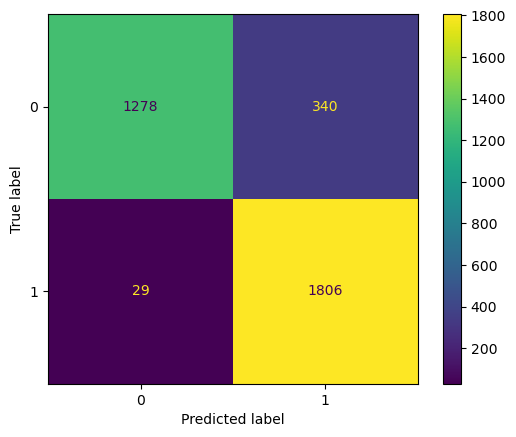

In [26]:
predictions = bagging.predict(test_set)

cm = confusion_matrix(test_label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [27]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

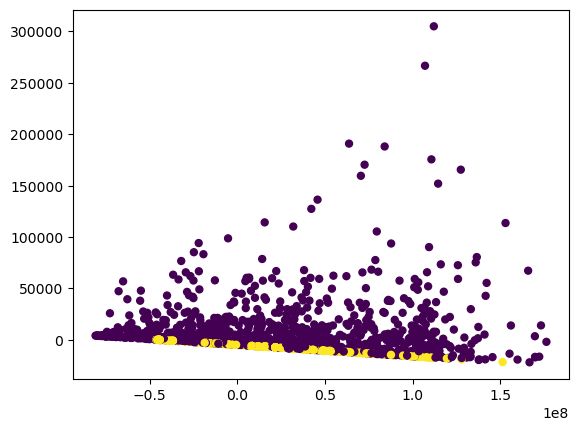

In [28]:
#true labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label, s=25);

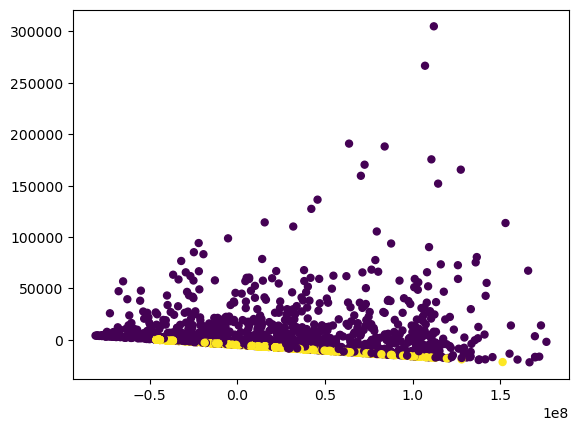

In [29]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred, s=25);

## AdaBoost

In [30]:
param_grid = {'n_estimators': np.arange(5, 100, 5),
              'learning_rate': [0.8, 0.9, 1.0, 1.1, 1.2],
              'algorithm': ['SAMME', 'SAMME.R'],
             }

ada = AdaBoostClassifier()

grid = GridSearchCV(
    ada,
    param_grid,
    cv=3,
    scoring='accuracy',
    return_train_score=False,
    verbose=4
)

grid.fit(train_set, train_label)

Fitting 3 folds for each of 190 candidates, totalling 570 fits
[CV 1/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=5;, score=0.851 total time=   0.0s
[CV 2/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=5;, score=0.853 total time=   0.0s
[CV 3/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=5;, score=0.862 total time=   0.0s
[CV 1/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=10;, score=0.851 total time=   0.1s
[CV 2/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=10;, score=0.853 total time=   0.1s
[CV 3/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=10;, score=0.862 total time=   0.1s
[CV 1/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=15;, score=0.851 total time=   0.1s
[CV 2/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=15;, score=0.853 total time=   0.1s
[CV 3/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=15;, score=0.862 total time=   0.1s
[CV 1/3] END algorithm=SAMME, learning_rate=0.8, n_estimat

[CV 1/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=50;, score=0.891 total time=   0.3s
[CV 2/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=50;, score=0.891 total time=   0.3s
[CV 3/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=50;, score=0.899 total time=   0.3s
[CV 1/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=55;, score=0.890 total time=   0.3s
[CV 2/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=55;, score=0.891 total time=   0.3s
[CV 3/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=55;, score=0.899 total time=   0.3s
[CV 1/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=60;, score=0.890 total time=   0.3s
[CV 2/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=60;, score=0.891 total time=   0.3s
[CV 3/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=60;, score=0.900 total time=   0.3s
[CV 1/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=65;, score=0.890 total time=   0.3s
[CV 2/3] END algorit

[CV 1/3] END algorithm=SAMME, learning_rate=1.0, n_estimators=95;, score=0.891 total time=   0.5s
[CV 2/3] END algorithm=SAMME, learning_rate=1.0, n_estimators=95;, score=0.893 total time=   0.5s
[CV 3/3] END algorithm=SAMME, learning_rate=1.0, n_estimators=95;, score=0.900 total time=   0.5s
[CV 1/3] END algorithm=SAMME, learning_rate=1.1, n_estimators=5;, score=0.851 total time=   0.0s
[CV 2/3] END algorithm=SAMME, learning_rate=1.1, n_estimators=5;, score=0.853 total time=   0.0s
[CV 3/3] END algorithm=SAMME, learning_rate=1.1, n_estimators=5;, score=0.862 total time=   0.0s
[CV 1/3] END algorithm=SAMME, learning_rate=1.1, n_estimators=10;, score=0.864 total time=   0.1s
[CV 2/3] END algorithm=SAMME, learning_rate=1.1, n_estimators=10;, score=0.858 total time=   0.1s
[CV 3/3] END algorithm=SAMME, learning_rate=1.1, n_estimators=10;, score=0.867 total time=   0.1s
[CV 1/3] END algorithm=SAMME, learning_rate=1.1, n_estimators=15;, score=0.890 total time=   0.1s
[CV 2/3] END algorithm=

[CV 1/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=45;, score=0.889 total time=   0.2s
[CV 2/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=45;, score=0.889 total time=   0.2s
[CV 3/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=45;, score=0.900 total time=   0.2s
[CV 1/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=50;, score=0.889 total time=   0.3s
[CV 2/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=50;, score=0.891 total time=   0.3s
[CV 3/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=50;, score=0.902 total time=   0.3s
[CV 1/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=55;, score=0.889 total time=   0.3s
[CV 2/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=55;, score=0.888 total time=   0.3s
[CV 3/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=55;, score=0.902 total time=   0.3s
[CV 1/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=60;, score=0.889 total time=   0.3s
[CV 2/3] END algorit

[CV 3/3] END algorithm=SAMME.R, learning_rate=0.8, n_estimators=85;, score=0.901 total time=   0.5s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.8, n_estimators=90;, score=0.887 total time=   0.5s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.8, n_estimators=90;, score=0.895 total time=   0.5s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.8, n_estimators=90;, score=0.901 total time=   0.5s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.8, n_estimators=95;, score=0.888 total time=   0.5s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.8, n_estimators=95;, score=0.894 total time=   0.5s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.8, n_estimators=95;, score=0.901 total time=   0.5s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.9, n_estimators=5;, score=0.890 total time=   0.0s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.9, n_estimators=5;, score=0.889 total time=   0.0s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.9, n_estimators=5;, score=0.899 total time=   0.0s
[CV

[CV 1/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=35;, score=0.885 total time=   0.2s
[CV 2/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=35;, score=0.893 total time=   0.2s
[CV 3/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=35;, score=0.904 total time=   0.2s
[CV 1/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=40;, score=0.887 total time=   0.2s
[CV 2/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=40;, score=0.893 total time=   0.2s
[CV 3/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=40;, score=0.904 total time=   0.2s
[CV 1/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=45;, score=0.887 total time=   0.3s
[CV 2/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=45;, score=0.893 total time=   0.3s
[CV 3/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=45;, score=0.904 total time=   0.3s
[CV 1/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=50;, score=0.888 total time=   0.3s


[CV 2/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=75;, score=0.892 total time=   0.5s
[CV 3/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=75;, score=0.898 total time=   0.4s
[CV 1/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=80;, score=0.886 total time=   0.5s
[CV 2/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=80;, score=0.892 total time=   0.5s
[CV 3/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=80;, score=0.899 total time=   0.5s
[CV 1/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=85;, score=0.888 total time=   0.5s
[CV 2/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=85;, score=0.892 total time=   0.5s
[CV 3/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=85;, score=0.900 total time=   0.5s
[CV 1/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=90;, score=0.888 total time=   0.5s
[CV 2/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=90;, score=0.891 total time=   0.5s


GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.8, 0.9, 1.0, 1.1, 1.2],
                         'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
             scoring='accuracy', verbose=4)

In [31]:
ada = grid.best_estimator_
ada

AdaBoostClassifier(n_estimators=15)

In [32]:
train_pred = ada.predict(train_set)
test_pred = ada.predict(test_set)

print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  0.8962135319677219
Accuracy test set  0.8922675933970461
Precision train set  0.9108499530262688
Recall train set  0.8962135319677219
F1 score train set  0.8945587698126869
Support train set  (array([0.99097594, 0.84021331]), array([0.78563858, 0.99369306]), array([0.87644103, 0.91053082]), array([3774, 4281]))


In [33]:
report_scores(test_label,test_pred)

              precision    recall  f1-score   support

        <=50       0.99      0.78      0.87      1618
         >50       0.84      0.99      0.91      1835

    accuracy                           0.89      3453
   macro avg       0.91      0.89      0.89      3453
weighted avg       0.91      0.89      0.89      3453



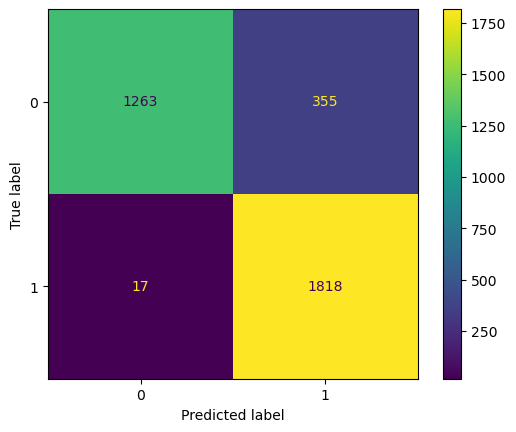

In [34]:
predictions = ada.predict(test_set)

cm = confusion_matrix(test_label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [35]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

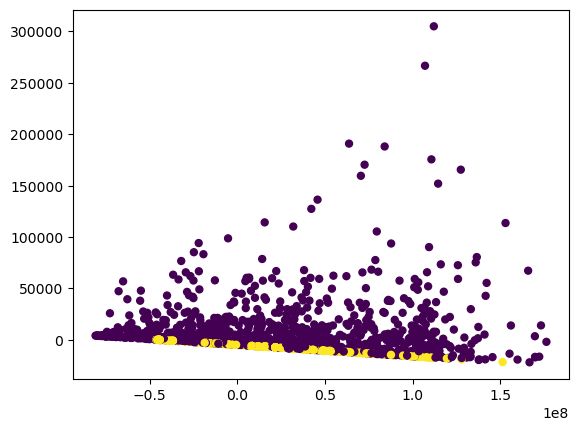

In [36]:
#true labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label, s=25);

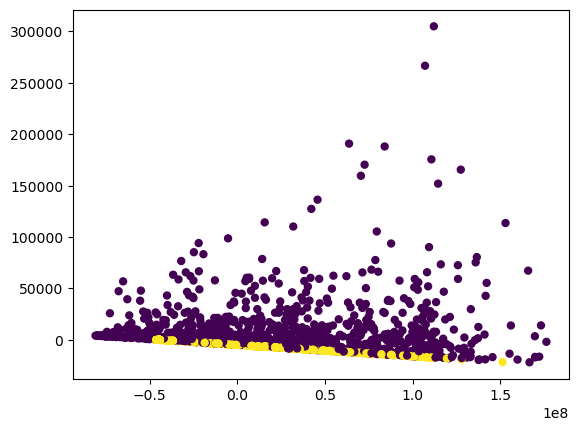

In [37]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred, s=25);

## Save models

In [38]:
with open("models_checkpoints/bagging_no_lang.bin", "wb") as f:
    pickle.dump(bagging, f)
    
with open("models_checkpoints/adaboost_no_lang.bin", "wb") as f:
    pickle.dump(ada, f)